# <font color=pink>Домашнее задание №2</font>
<font color=grey>Датасет содержит данные о **маркетинговых расходах на рекламные кампании** с января 2018 по февраль 2020</font>

### Импортиурем библиотеки 

In [1]:
import numpy as np
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

In [2]:
md = pd.read_csv('Sample Media Spend Data.csv.xls')
md

Division Calendar_Week  Paid_Views  Organic_Views  Google_Impressions  \
0           A      1/6/2018         392            422                 408   
1           A     1/13/2018         787            904                 110   
2           A     1/20/2018          81            970                 742   
3           A     1/27/2018          25            575                  65   
4           A      2/3/2018         565            284                 295   
...       ...           ...         ...            ...                 ...   
3046        Z      2/1/2020       29239          25311              622406   
3047        Z      2/8/2020       26230          28031              624409   
3048        Z     2/15/2020       24749          31281              439362   
3049        Z     2/22/2020       20713          30356              464178   
3050        Z     2/29/2020       15990          26993              449032   

      Email_Impressions  Facebook_Impressions  Affiliate_Impressions  \
0          3.498950e+05                 73580                  12072   
1          5.062702e+05                 11804                   9499   
2          4.300422e+05                 52232                  17048   
3          4.177457e+05                 78640                  10207   
4          4.085058e+05                 40561                   5834   
...                 ...                   ...                    ...   
3046       1.459071e+06                 45026                  12098   
3047       5.342505e+05                227070                   9548   
3048       4.227182e+05                393685                   9861   
3049       6.085799e+05                424676                  10221   
3050       4.390165e+05                161439                  10294   

      Overall_Views   Sales  
0               682   59417  
1               853   56806  
2               759   48715  
3               942   72047  
4               658   56235  
...             ...     ...  
3046          53667   82707  
3047          53665   84503  
3048          55561  147325  
3049          49221  111525  
3050          42994   98187  

[3051 rows x 10 columns]

In [3]:
md.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3051 entries, 0 to 3050
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Division               3051 non-null   object 
 1   Calendar_Week          3051 non-null   object 
 2   Paid_Views             3051 non-null   int64  
 3   Organic_Views          3051 non-null   int64  
 4   Google_Impressions     3051 non-null   int64  
 5   Email_Impressions      3051 non-null   float64
 6   Facebook_Impressions   3051 non-null   int64  
 7   Affiliate_Impressions  3051 non-null   int64  
 8   Overall_Views          3051 non-null   int64  
 9   Sales                  3051 non-null   int64  
dtypes: float64(1), int64(7), object(2)
memory usage: 238.5+ KB


###### Пропущенных значений нет

In [4]:
md.shape

(3051, 10)

In [5]:
#Добавим колонку с общим кол-вом просмотров на Youtube

md['YT_views'] = md['Paid_Views'] + md['Organic_Views']
md

Division Calendar_Week  Paid_Views  Organic_Views  Google_Impressions  \
0           A      1/6/2018         392            422                 408   
1           A     1/13/2018         787            904                 110   
2           A     1/20/2018          81            970                 742   
3           A     1/27/2018          25            575                  65   
4           A      2/3/2018         565            284                 295   
...       ...           ...         ...            ...                 ...   
3046        Z      2/1/2020       29239          25311              622406   
3047        Z      2/8/2020       26230          28031              624409   
3048        Z     2/15/2020       24749          31281              439362   
3049        Z     2/22/2020       20713          30356              464178   
3050        Z     2/29/2020       15990          26993              449032   

      Email_Impressions  Facebook_Impressions  Affiliate_Impressions  \
0          3.498950e+05                 73580                  12072   
1          5.062702e+05                 11804                   9499   
2          4.300422e+05                 52232                  17048   
3          4.177457e+05                 78640                  10207   
4          4.085058e+05                 40561                   5834   
...                 ...                   ...                    ...   
3046       1.459071e+06                 45026                  12098   
3047       5.342505e+05                227070                   9548   
3048       4.227182e+05                393685                   9861   
3049       6.085799e+05                424676                  10221   
3050       4.390165e+05                161439                  10294   

      Overall_Views   Sales  YT_views  
0               682   59417       814  
1               853   56806      1691  
2               759   48715      1051  
3               942   72047       600  
4               658   56235       849  
...             ...     ...       ...  
3046          53667   82707     54550  
3047          53665   84503     54261  
3048          55561  147325     56030  
3049          49221  111525     51069  
3050          42994   98187     42983  

[3051 rows x 11 columns]

In [6]:
md.columns

Index(['Division', 'Calendar_Week', 'Paid_Views', 'Organic_Views',
       'Google_Impressions', 'Email_Impressions', 'Facebook_Impressions',
       'Affiliate_Impressions', 'Overall_Views', 'Sales', 'YT_views'],
      dtype='object')

In [7]:
#Сократим названия колонок

md.columns = ['div', 'date', 'YT_pviews', 'YT_oviews', 'Google_imp', 'Email_imp', 
              'FB_imp', 'Aff_impt', 'Overall_views', 'Sales', 'YT_views']
md

div       date  YT_pviews  YT_oviews  Google_imp     Email_imp  FB_imp  \
0      A   1/6/2018        392        422         408  3.498950e+05   73580   
1      A  1/13/2018        787        904         110  5.062702e+05   11804   
2      A  1/20/2018         81        970         742  4.300422e+05   52232   
3      A  1/27/2018         25        575          65  4.177457e+05   78640   
4      A   2/3/2018        565        284         295  4.085058e+05   40561   
...   ..        ...        ...        ...         ...           ...     ...   
3046   Z   2/1/2020      29239      25311      622406  1.459071e+06   45026   
3047   Z   2/8/2020      26230      28031      624409  5.342505e+05  227070   
3048   Z  2/15/2020      24749      31281      439362  4.227182e+05  393685   
3049   Z  2/22/2020      20713      30356      464178  6.085799e+05  424676   
3050   Z  2/29/2020      15990      26993      449032  4.390165e+05  161439   

      Aff_impt  Overall_views   Sales  YT_views  
0        12072            682   59417       814  
1         9499            853   56806      1691  
2        17048            759   48715      1051  
3        10207            942   72047       600  
4         5834            658   56235       849  
...        ...            ...     ...       ...  
3046     12098          53667   82707     54550  
3047      9548          53665   84503     54261  
3048      9861          55561  147325     56030  
3049     10221          49221  111525     51069  
3050     10294          42994   98187     42983  

[3051 rows x 11 columns]

In [8]:
md.iloc[10]

div                        A
date               3/17/2018
YT_pviews                650
YT_oviews                466
Google_imp               290
Email_imp        464972.6858
FB_imp                 11438
Aff_impt                6900
Overall_views            978
Sales                  62945
YT_views                1116
Name: 10, dtype: object

In [9]:
md.loc[10]

div                        A
date               3/17/2018
YT_pviews                650
YT_oviews                466
Google_imp               290
Email_imp        464972.6858
FB_imp                 11438
Aff_impt                6900
Overall_views            978
Sales                  62945
YT_views                1116
Name: 10, dtype: object

###### Рекламная кампания А, которая была активна 17 марта 2018, получила 290 показов в Google (как пример); также в этот день было продано товаров на сумму 62 945 д.е.

In [10]:
md.iloc[235, 0]

'C'

In [11]:
md['div'][300]

'C'

In [12]:
md.head(15)

div       date  YT_pviews  YT_oviews  Google_imp    Email_imp  FB_imp  \
0    A   1/6/2018        392        422         408  349895.0107   73580   
1    A  1/13/2018        787        904         110  506270.2176   11804   
2    A  1/20/2018         81        970         742  430042.1538   52232   
3    A  1/27/2018         25        575          65  417745.6658   78640   
4    A   2/3/2018        565        284         295  408505.8012   40561   
5    A  2/10/2018        256        330         683  434729.7550   36750   
6    A  2/17/2018        886         56         664  634432.9117  112489   
7    A  2/24/2018        336         99         470  555036.3088     218   
8    A   3/3/2018        305        209         501  423690.0837   13065   
9    A  3/10/2018        955        283         609  471730.0390   84449   
10   A  3/17/2018        650        466         290  464972.6858   11438   
11   A  3/24/2018        962        614         605  424832.1916   58830   
12   A  3/31/2018        674        831         762  427351.2598   29536   
13   A   4/7/2018        604         22      130736  418862.0356   91874   
14   A  4/14/2018        342        432      208099  508059.5563   61025   

    Aff_impt  Overall_views  Sales  YT_views  
0      12072            682  59417       814  
1       9499            853  56806      1691  
2      17048            759  48715      1051  
3      10207            942  72047       600  
4       5834            658  56235       849  
5       8469            691  56347       586  
6       8331            685  81604       942  
7       6319            569  80492       435  
8       7898            772  61804       514  
9       8428            833  64944      1238  
10      6900            978  62945      1116  
11     14151            196  65018      1576  
12      7840            571  68472      1505  
13      6575            737  53473       626  
14      7733            550  59351       774

In [13]:
md.tail(10)

div        date  YT_pviews  YT_oviews  Google_imp     Email_imp  FB_imp  \
3041   Z  12/28/2019       8438      17143      598200  3.897592e+05  111386   
3042   Z    1/4/2020      33345      21075      306532  4.496571e+05  110314   
3043   Z   1/11/2020       8568      25140      289894  5.970322e+05  149930   
3044   Z   1/18/2020      17725      23274      327776  5.656911e+05  158896   
3045   Z   1/25/2020      23817      22134      560621  4.684737e+05  123430   
3046   Z    2/1/2020      29239      25311      622406  1.459071e+06   45026   
3047   Z    2/8/2020      26230      28031      624409  5.342505e+05  227070   
3048   Z   2/15/2020      24749      31281      439362  4.227182e+05  393685   
3049   Z   2/22/2020      20713      30356      464178  6.085799e+05  424676   
3050   Z   2/29/2020      15990      26993      449032  4.390165e+05  161439   

      Aff_impt  Overall_views   Sales  YT_views  
3041      8484          24536  120823     25581  
3042      9485          53762  132942     54420  
3043      9836          33988   94164     33708  
3044     17501          40339  104771     40999  
3045     13474          44967   77487     45951  
3046     12098          53667   82707     54550  
3047      9548          53665   84503     54261  
3048      9861          55561  147325     56030  
3049     10221          49221  111525     51069  
3050     10294          42994   98187     42983

In [14]:
md.iloc[345:350]

div       date  YT_pviews  YT_oviews  Google_imp    Email_imp  FB_imp  \
345   D  2/17/2018        138        157         887  1555413.305  251488   
346   D  2/24/2018        708        768         875  1361595.927     453   
347   D   3/3/2018        836        476          28  1037976.268   37343   
348   D  3/10/2018        998        266         334  1157819.831  163395   
349   D  3/17/2018         68        725         968  1141788.672   18411   

     Aff_impt  Overall_views   Sales  YT_views  
345     42720            679  156648       295  
346     34346             24  158017      1476  
347     38703            642  127988      1312  
348     37326            945  143806      1264  
349     42546            635  160994       793

In [15]:
md['div'].unique()

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
       'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'],
      dtype=object)

In [16]:
md[['div', 'Sales']]

div   Sales
0      A   59417
1      A   56806
2      A   48715
3      A   72047
4      A   56235
...   ..     ...
3046   Z   82707
3047   Z   84503
3048   Z  147325
3049   Z  111525
3050   Z   98187

[3051 rows x 2 columns]

In [17]:
md[md['div'] == 'O']

div       date  YT_pviews  YT_oviews  Google_imp    Email_imp   FB_imp  \
1582   O   1/6/2018        185        222         669  1440437.389   230891   
1583   O  1/13/2018        726         16         105  2085198.712    42377   
1584   O  1/20/2018        177         45         538  1768411.967   130524   
1585   O  1/27/2018        841        972         985  1720272.337   236205   
1586   O   2/3/2018        878        793         950  1681485.404   128555   
...   ..        ...        ...        ...         ...          ...      ...   
1690   O   2/1/2020      84267      56717     2616351  4106322.861   158521   
1691   O   2/8/2020      79379      61428     2686324  1503218.651   516137   
1692   O  2/15/2020      73312      75101     1973543  1189130.170   912486   
1693   O  2/22/2020      64240      76310     1998520  1711780.454  1018314   
1694   O  2/29/2020      49720      60330     1907306  1233603.428   423742   

      Aff_impt  Overall_views   Sales  YT_views  
1582     63602            582  195068       407  
1583     56199            752  196842       742  
1584     73848            555  195278       222  
1585     53148            613  240968      1813  
1586     44817            949  205462      1671  
...        ...            ...     ...       ...  
1690     26292         140350  243933    140984  
1691     21167         141097  261584    140807  
1692     23493         148445  430355    148413  
1693     28307         139111  386540    140550  
1694     24256         109443  314972    110050  

[113 rows x 11 columns]

In [18]:
md[md['div'] == 'O'].shape

(113, 11)

###### 113 дней была активна кампания О

In [19]:
md[(md['div'] == 'O') & (md['Sales'] > 300000)].shape

(43, 11)

###### В период запуска рекламной кампании О из 113 дней только 43 дня принесли продажи продукции свыше 300 000 д.е.

In [20]:
md[(md['Overall_views'] > 100000) & (md['Sales'] > 100000)]

div        date  YT_pviews  YT_oviews  Google_imp     Email_imp   FB_imp  \
161    B   12/8/2018     127934      14056     4759744  3.123675e+06   727994   
162    B  12/15/2018     118065      21987     4029480  2.592871e+06  1647626   
171    B   2/16/2019      88331      27367     2600816  3.365962e+06  1288726   
180    B   4/20/2019      45913      63300     4391027  2.819126e+06  1991810   
181    B   4/27/2019      59888      48963     3916949  3.273841e+06   732271   
...   ..         ...        ...        ...         ...           ...      ...   
2909   Z   8/17/2019      50558      80851      773555  7.178120e+05   208769   
2910   Z   8/24/2019      51766      56019     1076493  7.128876e+05   158169   
2933   Z    2/1/2020      52480      52321     1185817  2.675419e+06    71610   
2934   Z    2/8/2020      48372      54524     1259031  9.793808e+05   341423   
2935   Z   2/15/2020      45720      62301      873511  7.745703e+05   617157   

      Aff_impt  Overall_views    Sales  YT_views  
161      45462         142147  1656624    141990  
162      39128         139731  1791713    140052  
171      79824         115213   878908    115698  
180      72644         108750   579726    109213  
181      83282         107644   630316    108851  
...        ...            ...      ...       ...  
2909     26083         131763   122245    131409  
2910     25461         107936   201415    107785  
2933     20145         104088   144794    104801  
2934     18755         102020   141950    102896  
2935     20858         107629   249249    108021  

[184 rows x 11 columns]

In [21]:
md[(md['Overall_views'] > 100000) & (md['Sales'] > 100000)].shape

(184, 11)

###### Общих показов рекламной кампании свыше 100 000 и продаж свыше 100 000 происходило всего 184 дней из 3051

In [22]:
md[(md['YT_pviews'] > 50000) | (md['YT_oviews'] > 50000)]

div        date  YT_pviews  YT_oviews  Google_imp     Email_imp   FB_imp  \
74     A    6/8/2019      67920      17718      532704  2.435265e+05   148985   
161    B   12/8/2018     127934      14056     4759744  3.123675e+06   727994   
162    B  12/15/2018     118065      21987     4029480  2.592871e+06  1647626   
163    B  12/22/2018      69204      20527     3441797  2.530840e+06   558878   
164    B  12/29/2018      61107      18855     3516766  3.566030e+06   532831   
...   ..         ...        ...        ...         ...           ...      ...   
2936   Z   2/22/2020      36729      58704      892030  1.116236e+06   612204   
2937   Z   2/29/2020      29735      52409      831908  8.037641e+05   308350   
3012   Z    6/8/2019      75328      21525      589068  3.567024e+05   174416   
3020   Z    8/3/2019      50615      44531      305923  2.933033e+05    67700   
3021   Z   8/10/2019      25933      51191      338774  3.587224e+05    89419   

      Aff_impt  Overall_views    Sales  YT_views  
74        8295          84569    61429     85638  
161      45462         142147  1656624    141990  
162      39128         139731  1791713    140052  
163      44839          89308  1146554     89731  
164      51549          79858   654528     79962  
...        ...            ...      ...       ...  
2936     26511          94376   203100     95433  
2937     21448          81611   182305     82144  
3012     11076          96342    77276     96853  
3020      8037          95036    68906     95146  
3021      9089          76421    54609     77124  

[279 rows x 11 columns]

In [23]:
md[(md['YT_pviews'] > 50000) | (md['YT_oviews'] > 50000)].shape

(279, 11)

###### Органический или платный охват на Ютубе свыше 50 000 был всего 279 дней из 3051 

In [24]:
md[~((md['YT_pviews'] > 50000) | (md['YT_oviews'] > 50000))]

div       date  YT_pviews  YT_oviews  Google_imp     Email_imp  FB_imp  \
0      A   1/6/2018        392        422         408  3.498950e+05   73580   
1      A  1/13/2018        787        904         110  5.062702e+05   11804   
2      A  1/20/2018         81        970         742  4.300422e+05   52232   
3      A  1/27/2018         25        575          65  4.177457e+05   78640   
4      A   2/3/2018        565        284         295  4.085058e+05   40561   
...   ..        ...        ...        ...         ...           ...     ...   
3046   Z   2/1/2020      29239      25311      622406  1.459071e+06   45026   
3047   Z   2/8/2020      26230      28031      624409  5.342505e+05  227070   
3048   Z  2/15/2020      24749      31281      439362  4.227182e+05  393685   
3049   Z  2/22/2020      20713      30356      464178  6.085799e+05  424676   
3050   Z  2/29/2020      15990      26993      449032  4.390165e+05  161439   

      Aff_impt  Overall_views   Sales  YT_views  
0        12072            682   59417       814  
1         9499            853   56806      1691  
2        17048            759   48715      1051  
3        10207            942   72047       600  
4         5834            658   56235       849  
...        ...            ...     ...       ...  
3046     12098          53667   82707     54550  
3047      9548          53665   84503     54261  
3048      9861          55561  147325     56030  
3049     10221          49221  111525     51069  
3050     10294          42994   98187     42983  

[2772 rows x 11 columns]

In [25]:
md[~((md['YT_pviews'] > 50000) | (md['YT_oviews'] > 50000))].shape

(2772, 11)

###### Органический или платный охват на Ютубе ниже 50 000 было 2772 дней из 3051 

In [26]:
md[(md['div'] == 'P')
  & (md['FB_imp'] < 100000)
  & (md['Google_imp'] > 80000)
  & (md['Aff_impt'] > 12000)]

div        date  YT_pviews  YT_oviews  Google_imp    Email_imp  FB_imp  \
1708   P    4/7/2018        576        678      204713  699055.3157   87602   
1709   P   4/14/2018        209        400      355497  846837.4449   63269   
1710   P   4/21/2018        733         31      326710  686825.8804   45759   
1711   P   4/28/2018         47         96      356628  789341.9878   28457   
1712   P    5/5/2018        689        595      409284  666385.0163   54982   
1713   P   5/12/2018        534         48      528185  579232.1369   44848   
1714   P   5/19/2018         63        408      512766  631832.7069    5895   
1715   P   5/26/2018        583        736      515036  762482.5039   16873   
1716   P    6/2/2018        221         78      399621  558023.7948   55446   
1717   P    6/9/2018        261        209      355637  626924.6717   84948   
1718   P   6/16/2018        306        113      321196  564212.7013   44648   
1719   P   6/23/2018        986        177      345789  658653.3970   29489   
1720   P   6/30/2018        110        477      405673  620658.6763   38328   
1721   P    7/7/2018        159        927      579696  540187.1006   30780   
1724   P   7/28/2018        648        392      555865  612599.3906   69880   
1725   P    8/4/2018        420        563      529436  478241.5301   79550   
1726   P   8/11/2018        256        693      577048  596236.2576   98948   
1736   P  10/20/2018        369        953     1129903  431883.5072   99772   
1746   P  12/29/2018       3481       2950      676789  810920.1665   32317   
1747   P    1/5/2019       2293       2225      642316  809822.7540   13080   
1748   P   1/12/2019       4734       2156      574167  606728.8437   35791   
1749   P   1/19/2019       4616       1883      623478  761890.3422   83589   
1754   P   2/23/2019       2054       2506      497498  503132.2448   53302   
1755   P    3/2/2019        769       2032      737324  689482.2695   27830   
1756   P    3/9/2019        183       1412      744769  643280.1120   40338   
1757   P   3/16/2019         96       1435      746310  591719.7353   81302   
1760   P    4/6/2019       1078       6237      607165  608404.1139   57326   
1780   P   8/24/2019      15431      20821      727967  443046.0954   93330   

      Aff_impt  Overall_views   Sales  YT_views  
1708     27380            672   73585      1254  
1709     27405            821   79120       609  
1710     32343            887   91111       764  
1711     24609            795   83443       143  
1712     21030            767   93888      1284  
1713     25462            459  100435       582  
1714     23485            249   75507       471  
1715     26781            445   80435      1319  
1716     26822            146   83027       299  
1717     21740            766   87246       470  
1718     23125            588   81040       419  
1719     27508            461   61272      1163  
1720     25737            242   98648       587  
1721     26190            881   65013      1086  
1724     27433            246   73713      1040  
1725     25436            921   77668       983  
1726     22707            806   75270       949  
1736     12141           1412  187322      1322  
1746     12842           5367   80022      6431  
1747     12952           3395   89386      4518  
1748     21260           5862   96651      6890  
1749     23720           6736   93568      6499  
1754     18092           3988  108898      4560  
1755     19055           1450  112143      2801  
1756     18770            984  105137      1595  
1757     27883           1675  104765      1531  
1760     16596           7324   87756      7315  
1780     12024          35978  134138     36252

In [27]:
md[(md['div'] == 'P')
  & (md['FB_imp'] < 100000)
  & (md['Google_imp'] > 80000)
  & (md['Aff_impt'] > 12000)].shape

(28, 11)

###### В период запуска рекламной кампании Р с 2018 по 2020, всего на протяжении 28 дней набралось меньше 100 000 показов на Facebook, при этом больше 80 000 показов в Google и свыше 12 000 показов в других медиа

In [28]:
# отсортируем данные по продажам

md['Sales'].sort_values(ascending=False)

213     3575430
212     3561292
159     3322758
214     2424124
160     2363272
         ...   
2178      20377
2152      19899
2160      18440
2228      18432
2230      15436
Name: Sales, Length: 3051, dtype: int64

In [29]:
md.iloc[213]

div                        B
date               12/7/2019
YT_pviews              62374
YT_oviews              92268
Google_imp           8074788
Email_imp        4723940.216
FB_imp               4405999
Aff_impt               63435
Overall_views         153916
Sales                3575430
YT_views              154642
Name: 213, dtype: object

In [30]:
md.sort_values(by=['Sales'], ascending=False)

div        date  YT_pviews  YT_oviews  Google_imp     Email_imp   FB_imp  \
213    B   12/7/2019      62374      92268     8074788  4.723940e+06  4405999   
212    B  11/30/2019      62934     100749    16001714  5.153552e+06  4599296   
159    B  11/24/2018       6313      21117    14455623  4.085228e+06  6232118   
214    B  12/14/2019      63230     101429     3454877  2.821666e+06  3994617   
160    B   12/1/2018      12544      13893     9718005  5.049751e+06  1194281   
...   ..         ...        ...        ...         ...           ...      ...   
2178   T   8/11/2018        681        690       95833  1.349837e+05    41134   
2152   T   2/10/2018        162        203         338  1.643042e+05    14800   
2160   T    4/7/2018        568        766       33311  1.577380e+05    38993   
2228   T   7/27/2019       5075      11213      150223  9.614313e+04    41479   
2230   T   8/10/2019       4325      15485       83819  9.288922e+04    26812   

      Aff_impt  Overall_views    Sales  YT_views  
213      63435         153916  3575430    154642  
212      63817         162813  3561292    163683  
159      52273          26417  3322758     27430  
214      52322         164152  2424124    164659  
160      53050          25608  2363272     26437  
...        ...            ...      ...       ...  
2178      3898            216    20377      1371  
2152      4103            839    19899       365  
2160      5102            149    18440      1334  
2228      3724          16039    18432     16288  
2230      2182          19029    15436     19810  

[3051 rows x 11 columns]

###### В период запуска рекламных кампаний с 2018 по 2020 наибольшие продажи были у продукта В 7 декабря 2019

In [31]:
# отсортируем данные по убыванию двух значений : органические и рекламные показы на Youtube

md.sort_values(by=['YT_pviews', 'YT_oviews'], ascending=[False, False])

div        date  YT_pviews  YT_oviews  Google_imp     Email_imp   FB_imp  \
187    B    6/8/2019     518190     118035     4258513  1.787703e+06  1080867   
2447   V    6/8/2019     361081      85635     1913726  8.022221e+05   462175   
195    B    8/3/2019     321082     243245     2300864  1.469535e+06   448841   
188    B   6/15/2019     320747     118357     3169725  1.921345e+06  1056987   
2455   V    8/3/2019     258535     178550     1035486  6.591208e+05   216961   
...   ..         ...        ...        ...         ...           ...      ...   
1043   J    7/7/2018          3         84      183326  3.529106e+05    21782   
2166   T   5/19/2018          2        390       89052  1.428665e+05     2037   
2528   W  10/27/2018          1       1988      461865  3.899682e+05    89096   
597    F   8/18/2018          1        356      792902  5.405730e+05   174166   
2837   Z   3/31/2018          1        288         243  1.146560e+06    65773   

      Aff_impt  Overall_views   Sales  YT_views  
187      71643         635057  503836    636225  
2447     33544         446589  214182    446716  
195      78338         563991  540922    564327  
188      71551         438477  718039    439104  
2455     26616         436507  251106    437085  
...        ...            ...     ...       ...  
1043     18406            972   41550        87  
2166      3966            556   25004       392  
2528     12010           2441  112718      1989  
597      21514            340   89758       357  
2837     39180            741  129508       289  

[3051 rows x 11 columns]

In [32]:
md.sort_values(by=['YT_oviews', 'YT_pviews'], ascending=[False, False])

div       date  YT_pviews  YT_oviews  Google_imp     Email_imp  FB_imp  \
196    B  8/10/2019     192719     270453     2614655  1.799258e+06  718174   
197    B  8/17/2019     186111     246839     3260361  1.962767e+06  889711   
193    B  7/20/2019     140159     245612     4510005  2.950986e+06  751226   
195    B   8/3/2019     321082     243245     2300864  1.469535e+06  448841   
2456   V  8/10/2019     156215     201438     1083782  8.065000e+05  303021   
...   ..        ...        ...        ...         ...           ...     ...   
1356   M   1/6/2018        199          4          16  4.644845e+05   97056   
2830   Z  2/10/2018        660          3         379  1.165446e+06   79818   
921    I   5/5/2018        174          3       90937  5.866451e+05   49656   
795    H   2/3/2018        414          1         333  4.168107e+05   46515   
2749   Y  9/22/2018        344          1      413953  2.615162e+05  109970   

      Aff_impt  Overall_views   Sales  YT_views  
196      92610         462512  429047    463172  
197     100329         432585  638861    432950  
193     101191         386044  694224    385771  
195      78338         563991  540922    564327  
2456     29058         357574  204353    357653  
...        ...            ...     ...       ...  
1356     31699            731   61417       203  
2830     35288            553  107352       663  
921      26988              7   71496       177  
795      13945            370   53573       415  
2749      6807            797   50735       345  

[3051 rows x 11 columns]

### Cоздадим бинарные переменные

In [33]:
md['Overall_views'].apply(lambda x: 1 if x <= 10000 else 0).sum()

1605

In [34]:
md['Overall_views'].apply(lambda x: 1 if x in range (10001,99999) else 0).sum()

1253

In [35]:
md['Overall_views'].apply(lambda x: 1 if x >= 100000 else 0).sum()

193

In [36]:
md['low'] = md['Overall_views'].apply(lambda x: 1 if x <= 10000 else 0)

In [37]:
md['medium'] = md['Overall_views'].apply(lambda x: 1 if x in range (10001,99999) else 0)

In [38]:
md['high'] = md['Overall_views'].apply(lambda x: 1 if x >= 100000 else 0)

In [39]:
md.head()

div       date  YT_pviews  YT_oviews  Google_imp    Email_imp  FB_imp  \
0   A   1/6/2018        392        422         408  349895.0107   73580   
1   A  1/13/2018        787        904         110  506270.2176   11804   
2   A  1/20/2018         81        970         742  430042.1538   52232   
3   A  1/27/2018         25        575          65  417745.6658   78640   
4   A   2/3/2018        565        284         295  408505.8012   40561   

   Aff_impt  Overall_views  Sales  YT_views  low  medium  high  
0     12072            682  59417       814    1       0     0  
1      9499            853  56806      1691    1       0     0  
2     17048            759  48715      1051    1       0     0  
3     10207            942  72047       600    1       0     0  
4      5834            658  56235       849    1       0     0

###### 53% рекламируемой продукции набрали меньше 10 000 показов;
###### 41% продукции - свыше 10 000, но меньше 100 000 показов;
###### 6% продукции - свыше 100 000 показов

### Создадим категориальную переменную

In [40]:
md['views'] = md['Overall_views']
md

div       date  YT_pviews  YT_oviews  Google_imp     Email_imp  FB_imp  \
0      A   1/6/2018        392        422         408  3.498950e+05   73580   
1      A  1/13/2018        787        904         110  5.062702e+05   11804   
2      A  1/20/2018         81        970         742  4.300422e+05   52232   
3      A  1/27/2018         25        575          65  4.177457e+05   78640   
4      A   2/3/2018        565        284         295  4.085058e+05   40561   
...   ..        ...        ...        ...         ...           ...     ...   
3046   Z   2/1/2020      29239      25311      622406  1.459071e+06   45026   
3047   Z   2/8/2020      26230      28031      624409  5.342505e+05  227070   
3048   Z  2/15/2020      24749      31281      439362  4.227182e+05  393685   
3049   Z  2/22/2020      20713      30356      464178  6.085799e+05  424676   
3050   Z  2/29/2020      15990      26993      449032  4.390165e+05  161439   

      Aff_impt  Overall_views   Sales  YT_views  low  medium  high  views  
0        12072            682   59417       814    1       0     0    682  
1         9499            853   56806      1691    1       0     0    853  
2        17048            759   48715      1051    1       0     0    759  
3        10207            942   72047       600    1       0     0    942  
4         5834            658   56235       849    1       0     0    658  
...        ...            ...     ...       ...  ...     ...   ...    ...  
3046     12098          53667   82707     54550    0       1     0  53667  
3047      9548          53665   84503     54261    0       1     0  53665  
3048      9861          55561  147325     56030    0       1     0  55561  
3049     10221          49221  111525     51069    0       1     0  49221  
3050     10294          42994   98187     42983    0       1     0  42994  

[3051 rows x 15 columns]

In [41]:
def get_views(views):
    if views <= 10000:
        return 'low'
    elif views in range(10001,99999):
        return 'medium'
    elif views >= 100000:
        return 'high'
    else:
        return views

In [42]:
md['views'].apply(get_views)

0          low
1          low
2          low
3          low
4          low
         ...  
3046    medium
3047    medium
3048    medium
3049    medium
3050    medium
Name: views, Length: 3051, dtype: object

In [43]:
md['views'] = md['views'].apply(get_views)
md.head()

div       date  YT_pviews  YT_oviews  Google_imp    Email_imp  FB_imp  \
0   A   1/6/2018        392        422         408  349895.0107   73580   
1   A  1/13/2018        787        904         110  506270.2176   11804   
2   A  1/20/2018         81        970         742  430042.1538   52232   
3   A  1/27/2018         25        575          65  417745.6658   78640   
4   A   2/3/2018        565        284         295  408505.8012   40561   

   Aff_impt  Overall_views  Sales  YT_views  low  medium  high views  
0     12072            682  59417       814    1       0     0   low  
1      9499            853  56806      1691    1       0     0   low  
2     17048            759  48715      1051    1       0     0   low  
3     10207            942  72047       600    1       0     0   low  
4      5834            658  56235       849    1       0     0   low

In [44]:
# удалим не нужные колонки

del md['low']
del md['medium']
del md['high']
md.head()

div       date  YT_pviews  YT_oviews  Google_imp    Email_imp  FB_imp  \
0   A   1/6/2018        392        422         408  349895.0107   73580   
1   A  1/13/2018        787        904         110  506270.2176   11804   
2   A  1/20/2018         81        970         742  430042.1538   52232   
3   A  1/27/2018         25        575          65  417745.6658   78640   
4   A   2/3/2018        565        284         295  408505.8012   40561   

   Aff_impt  Overall_views  Sales  YT_views views  
0     12072            682  59417       814   low  
1      9499            853  56806      1691   low  
2     17048            759  48715      1051   low  
3     10207            942  72047       600   low  
4      5834            658  56235       849   low

In [45]:
md['views'] = pd.Categorical(md['views'])
md.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3051 entries, 0 to 3050
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   div            3051 non-null   object  
 1   date           3051 non-null   object  
 2   YT_pviews      3051 non-null   int64   
 3   YT_oviews      3051 non-null   int64   
 4   Google_imp     3051 non-null   int64   
 5   Email_imp      3051 non-null   float64 
 6   FB_imp         3051 non-null   int64   
 7   Aff_impt       3051 non-null   int64   
 8   Overall_views  3051 non-null   int64   
 9   Sales          3051 non-null   int64   
 10  YT_views       3051 non-null   int64   
 11  views          3051 non-null   category
dtypes: category(1), float64(1), int64(8), object(2)
memory usage: 265.4+ KB


In [46]:
md['views'].cat.codes

0       1
1       1
2       1
3       1
4       1
       ..
3046    2
3047    2
3048    2
3049    2
3050    2
Length: 3051, dtype: int8

In [47]:
md['views'].cat.categories

Index(['high', 'low', 'medium'], dtype='object')

In [48]:
# создадим переменную на основе 2х колонок, которая будет показывать только наиболее значительное кол-во продаж и общих показов

md['high'] = np.where((md['views'] == 'high')&
                     (md['Sales'] >= 100000), 1, 0)
md.head()

div       date  YT_pviews  YT_oviews  Google_imp    Email_imp  FB_imp  \
0   A   1/6/2018        392        422         408  349895.0107   73580   
1   A  1/13/2018        787        904         110  506270.2176   11804   
2   A  1/20/2018         81        970         742  430042.1538   52232   
3   A  1/27/2018         25        575          65  417745.6658   78640   
4   A   2/3/2018        565        284         295  408505.8012   40561   

   Aff_impt  Overall_views  Sales  YT_views views  high  
0     12072            682  59417       814   low     0  
1      9499            853  56806      1691   low     0  
2     17048            759  48715      1051   low     0  
3     10207            942  72047       600   low     0  
4      5834            658  56235       849   low     0

In [49]:
md['high'].sum()

184

###### Наиболее значительные продажи и наиболее высокий охват был только 184 дня из 3051

In [50]:
# посмотрим, продукт с каким кол-вом показов имел большИе продажи

md['views'].value_counts()

low       1605
medium    1253
high       193
Name: views, dtype: int64

In [51]:
md['Sales'].value_counts()

73713     2
116050    2
72504     2
76308     2
101756    2
         ..
87939     1
76540     1
68466     1
72775     1
98187     1
Name: Sales, Length: 3030, dtype: int64

In [52]:
md.groupby('views')['Sales'].sum()

views
high       92063216
low       217796189
medium    257325756
Name: Sales, dtype: int64

In [53]:
md.groupby('views')['Sales'].value_counts()

views   Sales  
high    61878      1
        62051      1
        68464      1
        71490      1
        74568      1
                  ..
medium  1683384    1
        1756387    1
        1859541    1
        2363272    1
        3322758    1
Name: Sales, Length: 3036, dtype: int64

###### Наибольшие продажи были у продукции со среднем кол-вом показов. Можно предположить, что правило "чем больше - тем лучше" не сработало. 

<AxesSubplot:>

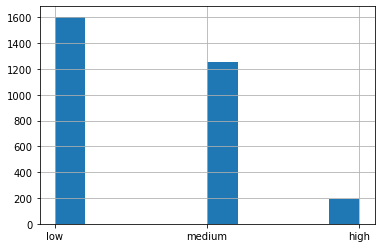

In [54]:
# визуализируем данные

md['views'].hist()

<AxesSubplot:>

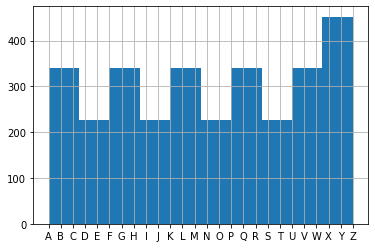

In [55]:
md['div'].hist()

<AxesSubplot:>

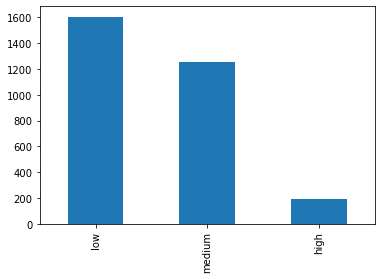

In [56]:
md['views'].value_counts().plot(kind='bar')

<AxesSubplot:>

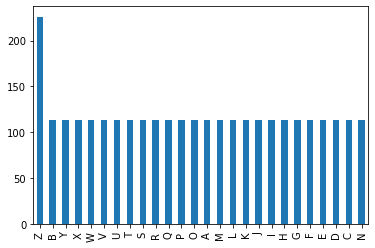

In [57]:
md['div'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='views'>

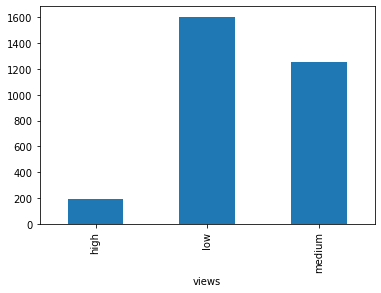

In [58]:
md.groupby('views').size().plot(kind='bar')

<AxesSubplot:xlabel='high,div'>

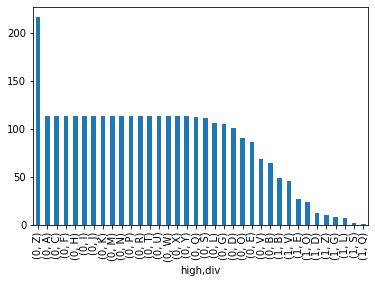

In [59]:
md.groupby('high')['div'].value_counts().plot(kind='bar')

###### Можем увидеть, что продукт B имел наибольшие продажи и показы, а продукт V - наименьшие

In [60]:
md.groupby('high')['div'].value_counts().unstack()

div       A     B      C      D     E      F      G      H      I      J  ...  \
high                                                                      ...   
0     113.0  64.0  113.0  101.0  86.0  113.0  105.0  113.0  113.0  113.0  ...   
1       NaN  49.0    NaN   12.0  27.0    NaN    8.0    NaN    NaN    NaN  ...   

div       Q      R      S      T      U     V      W      X      Y      Z  
high                                                                       
0     112.0  113.0  111.0  113.0  113.0  68.0  113.0  113.0  113.0  216.0  
1       1.0    NaN    2.0    NaN    NaN  45.0    NaN    NaN    NaN   10.0  

[2 rows x 26 columns]

<AxesSubplot:xlabel='div'>

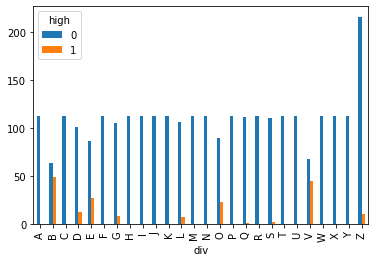

In [61]:
md.groupby('div')['high'].value_counts().unstack().plot(kind='bar')

<AxesSubplot:xlabel='div'>

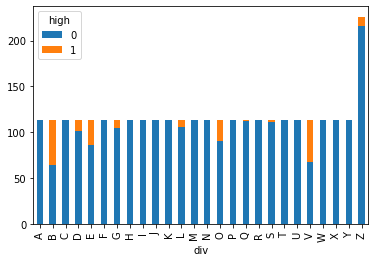

In [62]:
md.groupby('div')['high'].value_counts().unstack().plot(kind='bar', stacked=True)

In [63]:
# Найдем среднее арифметическое продаж

md['Sales'].mean()

185901.39659128155

In [64]:
md['Sales'].sum() / len(md['Sales'])

185901.39659128155

###### Средние продажи составили 185 901 д.е.

In [65]:
# Найдем медиану продаж

md['Sales'].median()

113573.0

###### На сумму 113 573 д.е. продалось 50% продуктов или меньше

In [66]:
# Найдем моду продаж

md['Sales'].mode()

0      54685
1      54744
2      59974
3      69510
4      72269
5      72504
6      73713
7      74590
8      76308
9      76957
10     81797
11     81899
12     89222
13    101756
14    116050
15    117706
16    141607
17    182603
18    197943
19    266295
20    292881
Name: Sales, dtype: int64

###### Совокупность мультимодальна (несколько значений продаж встречаются наиболее часто; можно предположить, что рекламное сообщение было связано с какой-либо акцией, при которой пользователи вели себя одинаково - покупали одни и те же товары)

<AxesSubplot:>

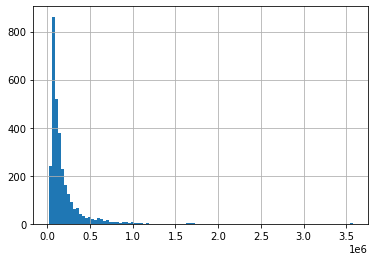

In [67]:
md['Sales'].hist(bins=100)

In [68]:
md['Sales'].describe()

count    3.051000e+03
mean     1.859014e+05
std      2.322079e+05
min      1.543600e+04
25%      7.339350e+04
50%      1.135730e+05
75%      2.029755e+05
max      3.575430e+06
Name: Sales, dtype: float64

In [69]:
md[['YT_pviews', 'YT_oviews']].describe()

YT_pviews      YT_oviews
count    3051.000000    3051.000000
mean    15093.941658   13355.673222
std     30785.884979   24079.399689
min         1.000000       1.000000
25%       537.000000     712.500000
50%      2699.000000    4110.000000
75%     17358.000000   16230.500000
max    518190.000000  270453.000000

In [70]:
# Сгруппируем данные и посмотрим, влияет ли кол-во показов на Youtube на продажи

md.groupby(['YT_pviews', 'YT_oviews'])['Sales'].mean()

YT_pviews  YT_oviews
1          288          129508.0
           356           89758.0
           1988         112718.0
2          390           25004.0
3          84            41550.0
                          ...   
258535     178550       251106.0
320747     118357       718039.0
321082     243245       540922.0
361081     85635        214182.0
518190     118035       503836.0
Name: Sales, Length: 3051, dtype: float64

In [71]:
md.groupby(['YT_pviews', 'YT_oviews'])['Sales'].agg(lambda x: x.value_counts().index[0])

YT_pviews  YT_oviews
1          288          129508
           356           89758
           1988         112718
2          390           25004
3          84            41550
                         ...  
258535     178550       251106
320747     118357       718039
321082     243245       540922
361081     85635        214182
518190     118035       503836
Name: Sales, Length: 3051, dtype: int64

In [72]:
md.groupby('Sales')[['YT_pviews', 'YT_oviews']].agg(lambda x: x.value_counts().index[0])

YT_pviews  YT_oviews
Sales                        
15436         4325      15485
18432         5075      11213
18440          568        766
19899          162        203
20377          681        690
...            ...        ...
2363272      12544      13893
2424124      63230     101429
3322758       6313      21117
3561292      62934     100749
3575430      62374      92268

[3030 rows x 2 columns]

In [73]:
md.groupby('YT_pviews')['Sales'].agg(['mean', 'median'])

mean    median
YT_pviews                         
1          110661.333333  112718.0
2           25004.000000   25004.0
3           64628.000000   64628.0
4          220730.000000  220730.0
5           81717.000000   81717.0
...                  ...       ...
258535     251106.000000  251106.0
320747     718039.000000  718039.0
321082     540922.000000  540922.0
361081     214182.000000  214182.0
518190     503836.000000  503836.0

[2345 rows x 2 columns]

In [74]:
md.groupby('YT_oviews')['Sales'].agg(['mean', 'median'])

mean    median
YT_oviews                         
1           52154.000000   52154.0
3           89424.000000   89424.0
4           61417.000000   61417.0
5          283622.333333   70678.0
8           93431.000000   93431.0
...                  ...       ...
201438     204353.000000  204353.0
243245     540922.000000  540922.0
245612     694224.000000  694224.0
246839     638861.000000  638861.0
270453     429047.000000  429047.0

[2553 rows x 2 columns]

In [75]:
md.pivot_table(index='Sales',
              values=['YT_oviews', 'YT_pviews'],
              aggfunc=['mean', 'median'])

mean              median          
        YT_oviews YT_pviews YT_oviews YT_pviews
Sales                                          
15436     15485.0    4325.0   15485.0    4325.0
18432     11213.0    5075.0   11213.0    5075.0
18440       766.0     568.0     766.0     568.0
19899       203.0     162.0     203.0     162.0
20377       690.0     681.0     690.0     681.0
...           ...       ...       ...       ...
2363272   13893.0   12544.0   13893.0   12544.0
2424124  101429.0   63230.0  101429.0   63230.0
3322758   21117.0    6313.0   21117.0    6313.0
3561292  100749.0   62934.0  100749.0   62934.0
3575430   92268.0   62374.0   92268.0   62374.0

[3030 rows x 4 columns]

###### Можем увидеть, что кол-во органических и платных показов на Youtube не влияет на продажи; возможно нужно смотреть на показы в сумме во всех медиа, либо можно сформировать гипотезу о том, что Youtube - не эффективный медиа канал

In [76]:
# Определим меры разброса

md.groupby('views')['Sales'].sum()

views
high       92063216
low       217796189
medium    257325756
Name: Sales, dtype: int64

In [77]:
md.groupby('views')['Sales'].agg(lambda x: x.value_counts().index[0])

views
high      1656624
low         89222
medium      81899
Name: Sales, dtype: int64

In [78]:
md_v = pd.DataFrame(md.groupby('views')['Sales'].agg(lambda x: x.value_counts().index[0]))

<AxesSubplot:xlabel='views'>

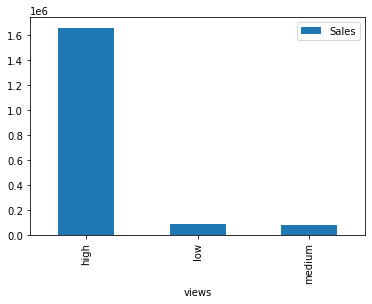

In [79]:
md_v.plot(kind='bar')

In [80]:
md_v['Sales'].max() - md_v['Sales'].min()

1574725

###### 1 574 725 д.е. - размах переменной или продаж в зависимости от кол-ва общих показов

In [81]:
md_v.describe()['Sales']['25%']

85560.5

In [82]:
np.percentile(md_v['Sales'], 25)

85560.5

In [83]:
np.percentile(md_v['Sales'], 75) - np.percentile(md_v['Sales'], 25)

787362.5

###### 787362.5  д.е. - интерквартильный размах

In [84]:
md_mean = md_v['Sales'].mean()
deviations = md_v['Sales'] - md_mean
sq_deviations = deviations ** 2
variance_samp = sq_deviations.sum() / (len(md_v) - 1)
std_samp = np.sqrt(variance_samp)
print(variance_samp, std_samp)

822760246926.3333 907061.3247880946


In [85]:
variance_pop = sq_deviations.sum() / (len(md_v))
std_pop = np.sqrt(variance_pop)
print(variance_pop, std_pop)

548506831284.22217 740612.4703812529


In [86]:
print(md_v['Sales'].var())
print(md_v['Sales'].std())

822760246926.3333
907061.3247880946


In [87]:
print(md_v['Sales'].var(ddof=0))
print(md_v['Sales'].std(ddof=0))

548506831284.22217
740612.4703812529


In [88]:
md.groupby('views')['Sales'].std()

views
high      494828.469806
low       129385.199373
medium    235977.017494
Name: Sales, dtype: float64

In [89]:
md.groupby('views')['Sales'].agg(['mean', 'std'])

mean            std
views                               
high    477011.481865  494828.469806
low     135698.560125  129385.199373
medium  205367.722267  235977.017494

In [90]:
def range_values(x):
    return x.max() - x.min()

md.pivot_table(index='Sales',
                   values=['YT_pviews', 'YT_oviews'],
                   aggfunc=['var', 'std', range_values])

var                        std               range_values  \
          YT_oviews     YT_pviews    YT_oviews     YT_pviews    YT_oviews   
Sales                                                                       
54685       29282.0  1.300500e+03   171.119841     36.062446          242   
54744       47432.0  5.408000e+03   217.788889     73.539105          308   
59974       44104.5  1.399464e+06   210.010714   1182.989645          297   
69510    39872450.0  1.168620e+09  6314.463556  34185.077336         8930   
72269    17222580.5  1.416244e+06  4150.009699   1190.060713         5869   
...             ...           ...          ...           ...          ...   
2363272         NaN           NaN          NaN           NaN            0   
2424124         NaN           NaN          NaN           NaN            0   
3322758         NaN           NaN          NaN           NaN            0   
3561292         NaN           NaN          NaN           NaN            0   
3575430         NaN           NaN          NaN           NaN            0   

                   
        YT_pviews  
Sales              
54685          51  
54744         104  
59974        1673  
69510       48345  
72269        1683  
...           ...  
2363272         0  
2424124         0  
3322758         0  
3561292         0  
3575430         0  

[3030 rows x 6 columns]

<AxesSubplot:>

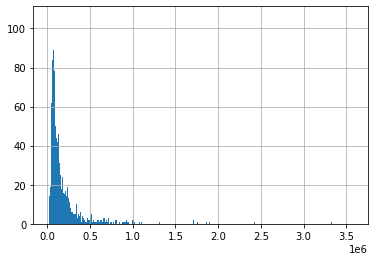

In [91]:
# Z-score

md['Sales'].hist(bins=1000)

<AxesSubplot:>

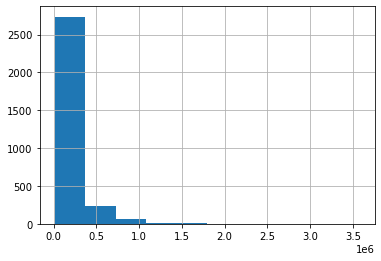

In [92]:
A = md[md['div'] == 'A']
md['Sales'].hist()

<AxesSubplot:>

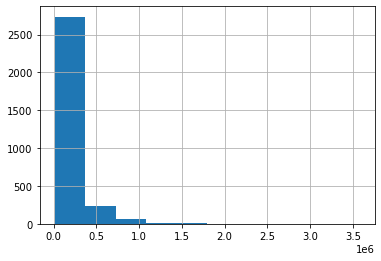

In [93]:
B = md[md['div'] == 'B']
md['Sales'].hist()

In [94]:
x = A['Sales'][0]
mean = A['Sales'].mean()
std = A['Sales'].std(ddof=0)
print(x, mean, std)

59417 103391.2389380531 61986.414006073064


In [95]:
z_score = (x - mean) / std
print(z_score)

-0.7094173722284493


In [96]:
scipy.stats.zscore(A['Sales'])

0     -0.709417
1     -0.751540
2     -0.882068
3     -0.505663
4     -0.760751
         ...   
108   -0.498758
109   -0.415869
110    1.045080
111    0.261457
112   -0.065083
Name: Sales, Length: 113, dtype: float64

In [97]:
A['z_score'] = scipy.stats.zscore(A['Sales'])

/var/folders/l7/j8jzwtl53wj2g2m9zwt6tcvh0000gn/T/ipykernel_3129/1823690658.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  A['z_score'] = scipy.stats.zscore(A['Sales'])


In [98]:
A.head()

div       date  YT_pviews  YT_oviews  Google_imp    Email_imp  FB_imp  \
0   A   1/6/2018        392        422         408  349895.0107   73580   
1   A  1/13/2018        787        904         110  506270.2176   11804   
2   A  1/20/2018         81        970         742  430042.1538   52232   
3   A  1/27/2018         25        575          65  417745.6658   78640   
4   A   2/3/2018        565        284         295  408505.8012   40561   

   Aff_impt  Overall_views  Sales  YT_views views  high   z_score  
0     12072            682  59417       814   low     0 -0.709417  
1      9499            853  56806      1691   low     0 -0.751540  
2     17048            759  48715      1051   low     0 -0.882068  
3     10207            942  72047       600   low     0 -0.505663  
4      5834            658  56235       849   low     0 -0.760751

In [99]:
B['z_score'] = scipy.stats.zscore(B['Sales'])
B.head()

/var/folders/l7/j8jzwtl53wj2g2m9zwt6tcvh0000gn/T/ipykernel_3129/2601107430.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  B['z_score'] = scipy.stats.zscore(B['Sales'])


div       date  YT_pviews  YT_oviews  Google_imp    Email_imp  FB_imp  \
113   B   1/6/2018        167        782         708  2567847.521  667172   
114   B  1/13/2018        552        143         441  3715496.894  103319   
115   B  1/20/2018        659        144         687  3151602.114  570292   
116   B  1/27/2018        108        850         631  3066068.937  777349   
117   B   2/3/2018        644        949         730  2996176.308  397171   

     Aff_impt  Overall_views   Sales  YT_views views  high   z_score  
113     95360            579  519479       949   low     0 -0.615171  
114     82360            502  501041       695   low     0 -0.646974  
115    112565            273  510120       803   low     0 -0.631314  
116     71675            988  594620       958   low     0 -0.485564  
117     51602            776  477962      1593   low     0 -0.686782

In [100]:
div_new = pd.concat([A, B])
div_new

div       date  YT_pviews  YT_oviews  Google_imp     Email_imp   FB_imp  \
0     A   1/6/2018        392        422         408  3.498950e+05    73580   
1     A  1/13/2018        787        904         110  5.062702e+05    11804   
2     A  1/20/2018         81        970         742  4.300422e+05    52232   
3     A  1/27/2018         25        575          65  4.177457e+05    78640   
4     A   2/3/2018        565        284         295  4.085058e+05    40561   
..   ..        ...        ...        ...         ...           ...      ...   
221   B   2/1/2020     183982     153772     4880566  7.317730e+06   280897   
222   B   2/8/2020     187562     164818     4924815  2.679299e+06  1066783   
223   B  2/15/2020     183691     198041     3581869  2.118857e+06  1884146   
224   B  2/22/2020     147564     190041     3670032  3.051189e+06  1779732   
225   B  2/29/2020     118075     173100     3534401  2.198398e+06   680796   

     Aff_impt  Overall_views    Sales  YT_views views  high   z_score  
0       12072            682    59417       814   low     0 -0.709417  
1        9499            853    56806      1691   low     0 -0.751540  
2       17048            759    48715      1051   low     0 -0.882068  
3       10207            942    72047       600   low     0 -0.505663  
4        5834            658    56235       849   low     0 -0.760751  
..        ...            ...      ...       ...   ...   ...       ...  
221     56815         336930   596327    337754  high     1 -0.482620  
222     49963         351518   619802    352380  high     1 -0.442129  
223     59426         381029  1181536    381732  high     1  0.526779  
224     70252         337803   968892    337605  high     1  0.160000  
225     59464         290587   715626    291175  high     1 -0.276847  

[226 rows x 14 columns]

<AxesSubplot:>

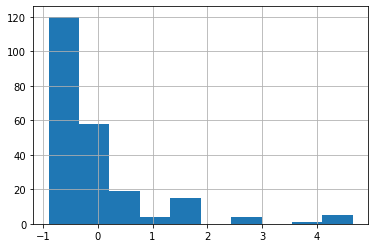

In [101]:
div_new['z_score'].hist()

In [102]:
div_new[div_new['z_score'] > 1]

div        date  YT_pviews  YT_oviews  Google_imp     Email_imp   FB_imp  \
44    A  11/10/2018        337       4371     1016756  5.569821e+05   194349   
45    A  11/17/2018        597       3605     1552213  5.471778e+05   283528   
46    A  11/24/2018        798       1815     1709493  5.570836e+05   743909   
47    A   12/1/2018       1738       1511     1160722  6.884426e+05   126493   
48    A   12/8/2018      24788       1632      558879  4.258051e+05    68776   
49    A  12/15/2018      20699       2982      462233  3.540469e+05   146088   
96    A   11/9/2019      11209      13837     2084147  5.446022e+05   354647   
97    A  11/16/2019      13201      20528     2237438  7.032708e+05   579792   
98    A  11/23/2019       8799      18109     1796295  3.809398e+05  1140918   
99    A  11/30/2019       8908      15294     1911999  7.021374e+05   689345   
100   A   12/7/2019       9177      13014      915377  6.437424e+05   694144   
101   A  12/14/2019       9113      13371      379714  3.843848e+05   632111   
102   A  12/21/2019       7847      12078      328445  3.897214e+05   341376   
110   A   2/15/2020      23008      25885      432938  2.889443e+05   292028   
157   B  11/10/2018        232      39333     8566232  4.088594e+06  1845957   
158   B  11/17/2018        189      36081    12556735  4.014758e+06  2570416   
159   B  11/24/2018       6313      21117    14455623  4.085228e+06  6232118   
160   B   12/1/2018      12544      13893     9718005  5.049751e+06  1194281   
161   B   12/8/2018     127934      14056     4759744  3.123675e+06   727994   
162   B  12/15/2018     118065      21987     4029480  2.592871e+06  1647626   
209   B   11/9/2019      81735     108591    16420655  3.996159e+06  2693115   
210   B  11/16/2019      92116     156033    17150439  5.160764e+06  4287559   
211   B  11/23/2019      59201     136241    13994100  2.795715e+06  7558435   
212   B  11/30/2019      62934     100749    16001714  5.153552e+06  4599296   
213   B   12/7/2019      62374      92268     8074788  4.723940e+06  4405999   
214   B  12/14/2019      63230     101429     3454877  2.821666e+06  3994617   
215   B  12/21/2019      58124      87304     2981529  2.856058e+06  2001672   

     Aff_impt  Overall_views    Sales  YT_views   views  high   z_score  
44       5073           4781   186876      4708     low     0  1.346824  
45       4760           3978   208474      4202     low     0  1.695255  
46       4953           3169   338311      2613     low     0  3.789859  
47       5750           2574   266300      3249     low     0  2.628137  
48       5247          26253   187382     26420  medium     0  1.354987  
49       4837          23170   190487     23681  medium     0  1.405078  
96       7103          24908   214919     25046  medium     0  1.799229  
97       6926          33367   217094     33729  medium     0  1.834317  
98       7574          25583   206061     26908  medium     0  1.656327  
99       6686          23127   388146     24202  medium     0  4.593825  
100      6474          21419   358799     22191  medium     0  4.120383  
101      7236          21993   275981     22484  medium     0  2.784316  
102      4683          19184   186635     19925  medium     0  1.342936  
110      6133          47734   168172     48893  medium     0  1.045080  
157     55509          39916  1683384     39565  medium     0  1.392393  
158     52308          36080  1859541     36270  medium     0  1.696238  
159     52273          26417  3322758     27430  medium     0  4.220071  
160     53050          25608  2363272     26437  medium     0  2.565099  
161     45462         142147  1656624    141990    high     1  1.346236  
162     39128         139731  1791713    140052    high     1  1.579244  
209     67371         190421  1612138    190326    high     1  1.269504  
210     65316         248312  1897738    248149    high     1  1.762122  
211     66344         195104  1712792    195442    high     1

In [103]:
div_new[div_new['z_score'] > 1].shape

(27, 14)

###### Всего 27 дней кол-во продаж продукции A&B было больше, чем 1 стандартное отклонение от среднего

In [104]:
div_new.groupby('Overall_views')['z_score'].mean()

Overall_views
20       -0.527568
61       -0.366691
121       0.126927
128      -0.010200
145      -0.262293
            ...   
432585   -0.409255
438477   -0.272685
462512   -0.771153
563991   -0.578185
635057   -0.642153
Name: z_score, Length: 223, dtype: float64

In [105]:
div_new.groupby('views')['z_score'].mean()

views
high      0.257605
low      -0.300062
medium    0.199794
Name: z_score, dtype: float64

###### Чем больше показов, тем больше продаж

In [106]:
# Выбросы

md['Sales'].describe()

count    3.051000e+03
mean     1.859014e+05
std      2.322079e+05
min      1.543600e+04
25%      7.339350e+04
50%      1.135730e+05
75%      2.029755e+05
max      3.575430e+06
Name: Sales, dtype: float64

In [107]:
q3 = np.percentile(md['Sales'], 75)
q1 = np.percentile(md['Sales'], 25)
print(q3, q1)

202975.5 73393.5


In [108]:
iqr = q3 - q1
print(iqr)

129582.0


In [109]:
iqr_threshold_bottom = q1 - 1.5 * iqr
iqr_threshold_top = q3 + 1.5 * iqr
print(iqr_threshold_bottom, iqr_threshold_top)

-120979.5 397348.5


In [110]:
md[md['Sales'] > iqr_threshold_top].shape

(286, 13)

In [111]:
md[md['Sales'] > iqr_threshold_top]['div'].value_counts

<bound method IndexOpsMixin.value_counts of 113     B
114     B
115     B
116     B
117     B
       ..
2925    Z
2926    Z
2984    Z
3037    Z
3038    Z
Name: div, Length: 286, dtype: object>

###### Наименьшее кол-во продаж у продукта Z, наибольшее - у продукта B

In [112]:
mean = md['Sales'].mean()
std = md['Sales'].std()
std_threshold_bottom = mean - 2.5 * std
std_threshold_top = mean + 2.5 * std
print(std_threshold_bottom, std_threshold_top)

-394618.3561740046 766421.1493565677


In [113]:
md[md['Sales'] > iqr_threshold_top].shape

(286, 13)

In [114]:
iqr_no_outliers = md[md['Sales'] <= iqr_threshold_top]
std_no_outliers = md[md['Sales'] <= std_threshold_top]

In [115]:
print(md['Sales'].mean())
print(iqr_no_outliers['Sales'].mean())
print(std_no_outliers['Sales'].mean())

185901.39659128155
129922.83978300181
158995.62596703667


In [116]:
print(md['Sales'].median())
print(iqr_no_outliers['Sales'].median())
print(std_no_outliers['Sales'].median())

113573.0
102759.0
111484.0


In [117]:
# Корреляция
# Создадим новую переменную

md['revenue'] = md['Sales']
md

div       date  YT_pviews  YT_oviews  Google_imp     Email_imp  FB_imp  \
0      A   1/6/2018        392        422         408  3.498950e+05   73580   
1      A  1/13/2018        787        904         110  5.062702e+05   11804   
2      A  1/20/2018         81        970         742  4.300422e+05   52232   
3      A  1/27/2018         25        575          65  4.177457e+05   78640   
4      A   2/3/2018        565        284         295  4.085058e+05   40561   
...   ..        ...        ...        ...         ...           ...     ...   
3046   Z   2/1/2020      29239      25311      622406  1.459071e+06   45026   
3047   Z   2/8/2020      26230      28031      624409  5.342505e+05  227070   
3048   Z  2/15/2020      24749      31281      439362  4.227182e+05  393685   
3049   Z  2/22/2020      20713      30356      464178  6.085799e+05  424676   
3050   Z  2/29/2020      15990      26993      449032  4.390165e+05  161439   

      Aff_impt  Overall_views   Sales  YT_views   views  high  revenue  
0        12072            682   59417       814     low     0    59417  
1         9499            853   56806      1691     low     0    56806  
2        17048            759   48715      1051     low     0    48715  
3        10207            942   72047       600     low     0    72047  
4         5834            658   56235       849     low     0    56235  
...        ...            ...     ...       ...     ...   ...      ...  
3046     12098          53667   82707     54550  medium     0    82707  
3047      9548          53665   84503     54261  medium     0    84503  
3048      9861          55561  147325     56030  medium     0   147325  
3049     10221          49221  111525     51069  medium     0   111525  
3050     10294          42994   98187     42983  medium     0    98187  

[3051 rows x 14 columns]

In [118]:
def get_rev(revenue):
    if revenue <= 50000:
        return 'low'
    elif revenue in range (50001, 99999):
        return 'medium'
    elif revenue >= 100000:
        return 'high'
    else:
        return revenue
    
md['revenue'].apply(get_rev)

md['revenue'] = md['revenue'].apply(get_rev)
md.head()

div       date  YT_pviews  YT_oviews  Google_imp    Email_imp  FB_imp  \
0   A   1/6/2018        392        422         408  349895.0107   73580   
1   A  1/13/2018        787        904         110  506270.2176   11804   
2   A  1/20/2018         81        970         742  430042.1538   52232   
3   A  1/27/2018         25        575          65  417745.6658   78640   
4   A   2/3/2018        565        284         295  408505.8012   40561   

   Aff_impt  Overall_views  Sales  YT_views views  high revenue  
0     12072            682  59417       814   low     0  medium  
1      9499            853  56806      1691   low     0  medium  
2     17048            759  48715      1051   low     0     low  
3     10207            942  72047       600   low     0  medium  
4      5834            658  56235       849   low     0  medium

In [119]:
md.groupby(md['views'])['Sales'].mean()

views
high      477011.481865
low       135698.560125
medium    205367.722267
Name: Sales, dtype: float64

In [120]:
sales_mean = md.groupby(md['Sales'])['Google_imp'].mean()
md_sum = md.groupby(md['Sales'])['FB_imp'].sum()

In [121]:
md_rate = pd.concat([sales_mean, md_sum], axis = 1)

In [122]:
first_five = md_rate.iloc[:5]
first_five

Google_imp  FB_imp
Sales                    
15436     83819.0   26812
18432    150223.0   41479
18440     33311.0   38993
19899       338.0   14800
20377     95833.0   41134

In [123]:
first_five['x - Mx'] = first_five['Google_imp'] - first_five['Google_imp'].mean()
first_five['y - My'] = first_five['FB_imp'] - first_five['FB_imp'].mean()

/var/folders/l7/j8jzwtl53wj2g2m9zwt6tcvh0000gn/T/ipykernel_3129/1639191796.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_five['x - Mx'] = first_five['Google_imp'] - first_five['Google_imp'].mean()
/var/folders/l7/j8jzwtl53wj2g2m9zwt6tcvh0000gn/T/ipykernel_3129/1639191796.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_five['y - My'] = first_five['FB_imp'] - first_five['FB_imp'].mean()


In [124]:
first_five

Google_imp  FB_imp   x - Mx   y - My
Sales                                      
15436     83819.0   26812  11114.2  -5831.6
18432    150223.0   41479  77518.2   8835.4
18440     33311.0   38993 -39393.8   6349.4
19899       338.0   14800 -72366.8 -17843.6
20377     95833.0   41134  23128.2   8490.4

In [125]:
SGx = (first_five['x - Mx'] ** 2).sum()
SFy = (first_five['y - My'] ** 2).sum()
SO = (first_five['x - Mx'] * first_five['y - My']).sum()
print(SGx, SFy, SO)

13456335628.800001 542867685.2 1857615643.6000001


In [126]:
r = SO / np.sqrt(SGx * SFy)
print(r)

0.6872985996856199


In [127]:
first_five['Google_imp'].corr(first_five['FB_imp'])

0.6872985996856199

<AxesSubplot:xlabel='FB_imp', ylabel='Google_imp'>

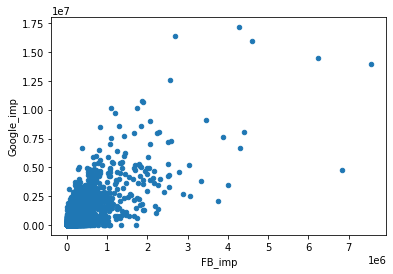

In [128]:
md_rate.plot('FB_imp', 'Google_imp', kind = 'scatter')

In [129]:
md_rate['FB_imp'].corr(md_rate['Google_imp'])

0.7283108603443073

###### Взаимосвязь между показами на Facebook и Google небольшая, но все же присутствует

In [130]:
md.corr()

YT_pviews  YT_oviews  Google_imp  Email_imp    FB_imp  \
YT_pviews       1.000000   0.798104    0.305230   0.290203  0.318325   
YT_oviews       0.798104   1.000000    0.429167   0.342697  0.410265   
Google_imp      0.305230   0.429167    1.000000   0.636719  0.728787   
Email_imp       0.290203   0.342697    0.636719   1.000000  0.515894   
FB_imp          0.318325   0.410265    0.728787   0.515894  1.000000   
Aff_impt        0.215768   0.231719    0.353054   0.697002  0.290033   
Overall_views   0.960312   0.934390    0.379076   0.330243  0.378120   
Sales           0.289688   0.390960    0.783338   0.746729  0.749133   
YT_views        0.960392   0.934386    0.378959   0.330083  0.377960   
high            0.743135   0.740578    0.339251   0.325318  0.327906   

               Aff_impt  Overall_views     Sales  YT_views      high  
YT_pviews      0.215768       0.960312  0.289688  0.960392  0.743135  
YT_oviews      0.231719       0.934390  0.390960  0.934386  0.740578  
Google_imp     0.353054       0.379076  0.783338  0.378959  0.339251  
Email_imp      0.697002       0.330243  0.746729  0.330083  0.325318  
FB_imp         0.290033       0.378120  0.749133  0.377960  0.327906  
Aff_impt       1.000000       0.234696  0.440282  0.234745  0.263126  
Overall_views  0.234696       1.000000  0.352200  0.999954  0.781919  
Sales          0.440282       0.352200  1.000000  0.352099  0.338947  
YT_views       0.234745       0.999954  0.352099  1.000000  0.781907  
high           0.263126       0.781919  0.338947  0.781907  1.000000

In [131]:
FB = md.groupby(md['Sales'])['FB_imp'].mean()
Google = md.groupby(md['Sales'])['Google_imp'].mean()
YT = md.groupby(md['Sales'])['YT_views'].mean()
Email = md.groupby(md['Sales'])['Email_imp'].mean()
Aff = md.groupby(md['Sales'])['Aff_impt'].mean()

md_rate = pd.concat([FB, Google, YT, Email, Aff], axis = 1)

md_rate.corr()

FB_imp  Google_imp  YT_views  Email_imp  Aff_impt
FB_imp      1.000000    0.728864  0.377502   0.516118  0.290822
Google_imp  0.728864    1.000000  0.378708   0.637088  0.354366
YT_views    0.377502    0.378708  1.000000   0.330158  0.235869
Email_imp   0.516118    0.637088  0.330158   1.000000  0.696636
Aff_impt    0.290822    0.354366  0.235869   0.696636  1.000000

<AxesSubplot:xlabel='Google_imp', ylabel='FB_imp'>

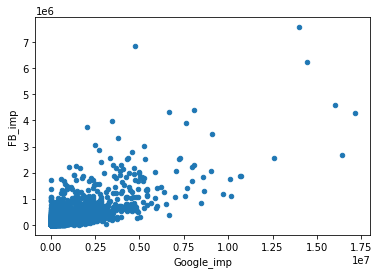

In [132]:
md_rate.plot('Google_imp', 'FB_imp', kind = 'scatter')

<AxesSubplot:xlabel='Google_imp', ylabel='YT_views'>

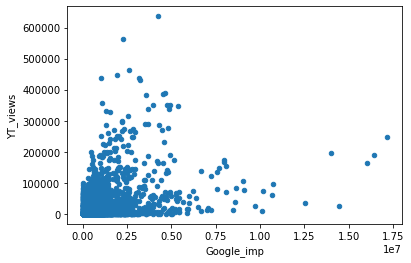

In [133]:
md_rate.plot('Google_imp', 'YT_views', kind = 'scatter')

<AxesSubplot:xlabel='Google_imp', ylabel='Email_imp'>

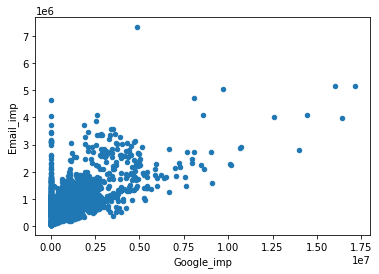

In [134]:
md_rate.plot('Google_imp', 'Email_imp', kind = 'scatter')

<AxesSubplot:xlabel='Google_imp', ylabel='Aff_impt'>

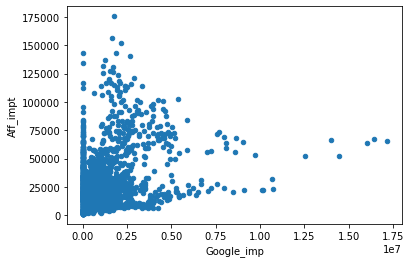

In [135]:
md_rate.plot('Google_imp', 'Aff_impt', kind = 'scatter')

<AxesSubplot:xlabel='FB_imp', ylabel='YT_views'>

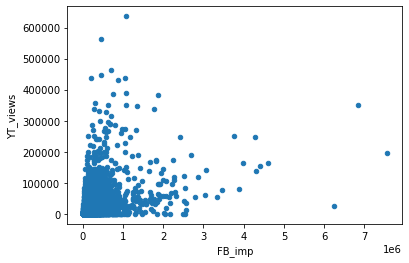

In [136]:
md_rate.plot('FB_imp', 'YT_views', kind = 'scatter')

<AxesSubplot:xlabel='FB_imp', ylabel='Email_imp'>

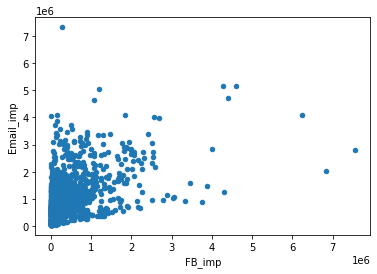

In [137]:
md_rate.plot('FB_imp', 'Email_imp', kind = 'scatter')

<AxesSubplot:xlabel='FB_imp', ylabel='Aff_impt'>

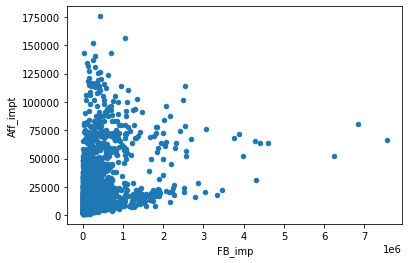

In [138]:
md_rate.plot('FB_imp', 'Aff_impt', kind = 'scatter')

<AxesSubplot:xlabel='YT_views', ylabel='Email_imp'>

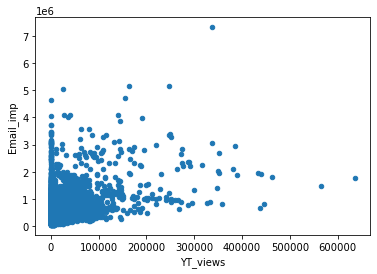

In [139]:
md_rate.plot('YT_views', 'Email_imp', kind = 'scatter')

<AxesSubplot:xlabel='YT_views', ylabel='Aff_impt'>

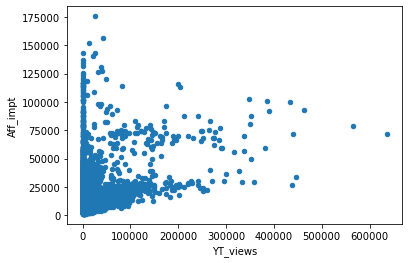

In [140]:
md_rate.plot('YT_views', 'Aff_impt', kind = 'scatter')

<AxesSubplot:xlabel='Email_imp', ylabel='Aff_impt'>

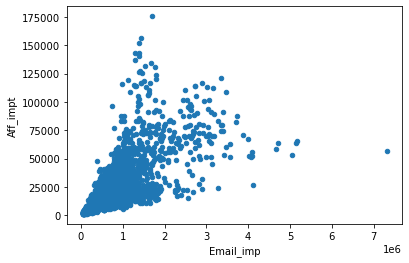

In [141]:
md_rate.plot('Email_imp', 'Aff_impt', kind = 'scatter')

In [142]:
md_rate.corr()['FB_imp'].sort_values()

Aff_impt      0.290822
YT_views      0.377502
Email_imp     0.516118
Google_imp    0.728864
FB_imp        1.000000
Name: FB_imp, dtype: float64

In [143]:
md_rate.corr()['Google_imp'].sort_values()

Aff_impt      0.354366
YT_views      0.378708
Email_imp     0.637088
FB_imp        0.728864
Google_imp    1.000000
Name: Google_imp, dtype: float64

In [144]:
md_rate.corr()['Email_imp'].sort_values()

YT_views      0.330158
FB_imp        0.516118
Google_imp    0.637088
Aff_impt      0.696636
Email_imp     1.000000
Name: Email_imp, dtype: float64

In [145]:
md_rate.corr()['Aff_impt'].sort_values()

YT_views      0.235869
FB_imp        0.290822
Google_imp    0.354366
Email_imp     0.696636
Aff_impt      1.000000
Name: Aff_impt, dtype: float64

In [146]:
md_rate.corr()['YT_views'].sort_values()

Aff_impt      0.235869
Email_imp     0.330158
FB_imp        0.377502
Google_imp    0.378708
YT_views      1.000000
Name: YT_views, dtype: float64

In [147]:
corr = md_rate.corr()

In [148]:
corr.abs().unstack().sort_values()

YT_views    Aff_impt      0.235869
Aff_impt    YT_views      0.235869
            FB_imp        0.290822
FB_imp      Aff_impt      0.290822
Email_imp   YT_views      0.330158
YT_views    Email_imp     0.330158
Aff_impt    Google_imp    0.354366
Google_imp  Aff_impt      0.354366
YT_views    FB_imp        0.377502
FB_imp      YT_views      0.377502
Google_imp  YT_views      0.378708
YT_views    Google_imp    0.378708
FB_imp      Email_imp     0.516118
Email_imp   FB_imp        0.516118
            Google_imp    0.637088
Google_imp  Email_imp     0.637088
Email_imp   Aff_impt      0.696636
Aff_impt    Email_imp     0.696636
Google_imp  FB_imp        0.728864
FB_imp      Google_imp    0.728864
            FB_imp        1.000000
YT_views    YT_views      1.000000
Google_imp  Google_imp    1.000000
Email_imp   Email_imp     1.000000
Aff_impt    Aff_impt      1.000000
dtype: float64

###### Самая сильная корреляция у показов на Facebook & Google

In [149]:
# Визуализация данных

md_sales = md.groupby(md['views'])['Sales'].mean()
md_sales

views
high      477011.481865
low       135698.560125
medium    205367.722267
Name: Sales, dtype: float64

<BarContainer object of 3 artists>

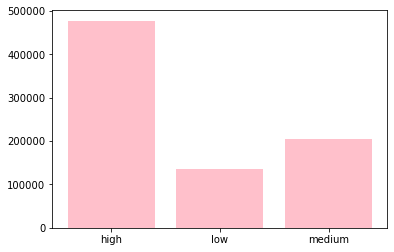

In [150]:
plt.bar(md_sales.index, md_sales, color='pink')

<BarContainer object of 3 artists>

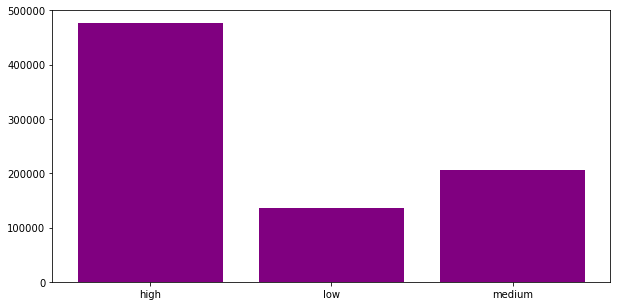

In [151]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.bar(md_sales.index, md_sales, color='purple')

In [152]:
md_sum = md.groupby(md['Overall_views'])['Sales'].sum()
md_sum

Overall_views
2         136745
3         126423
4         162489
5          68466
6         102645
           ...  
438477    718039
446589    214182
462512    429047
563991    540922
635057    503836
Name: Sales, Length: 2601, dtype: int64

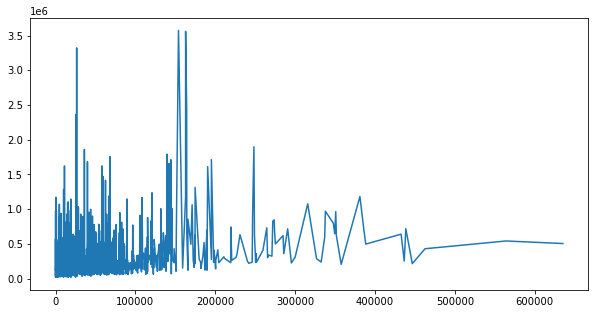

In [153]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(md_sum)

In [154]:
youtube = md.groupby(['views', 'YT_views'])['Sales'].sum()
youtube

views   YT_views
high    67          0
        69          0
        79          0
        87          0
        92          0
                   ..
medium  439104      0
        446716      0
        463172      0
        564327      0
        636225      0
Name: Sales, Length: 8145, dtype: int64

In [155]:
youtube.loc['high']

YT_views
67             0
69             0
79             0
87             0
92             0
           ...  
439104    718039
446716    214182
463172    429047
564327    540922
636225    503836
Name: Sales, Length: 2715, dtype: int64

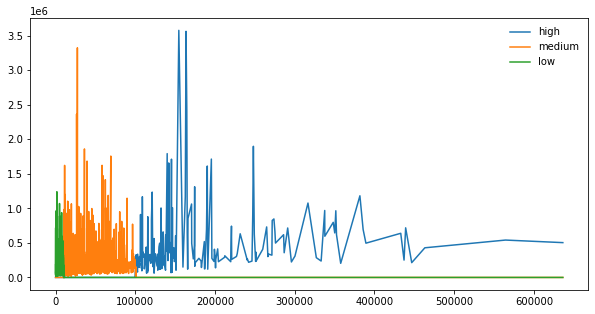

In [156]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(youtube.loc['high'])
ax.plot(youtube.loc['medium'])
ax.plot(youtube.loc['low'])
ax.legend(['high', 'medium', 'low'], frameon=False)

In [157]:
youtube_m = md.groupby(['views', 'YT_views'])['Sales'].mean()
youtube_m

views   YT_views
high    67         NaN
        69         NaN
        79         NaN
        87         NaN
        92         NaN
                    ..
medium  439104     NaN
        446716     NaN
        463172     NaN
        564327     NaN
        636225     NaN
Name: Sales, Length: 8145, dtype: float64

NameError: name 'vs_m' is not defined

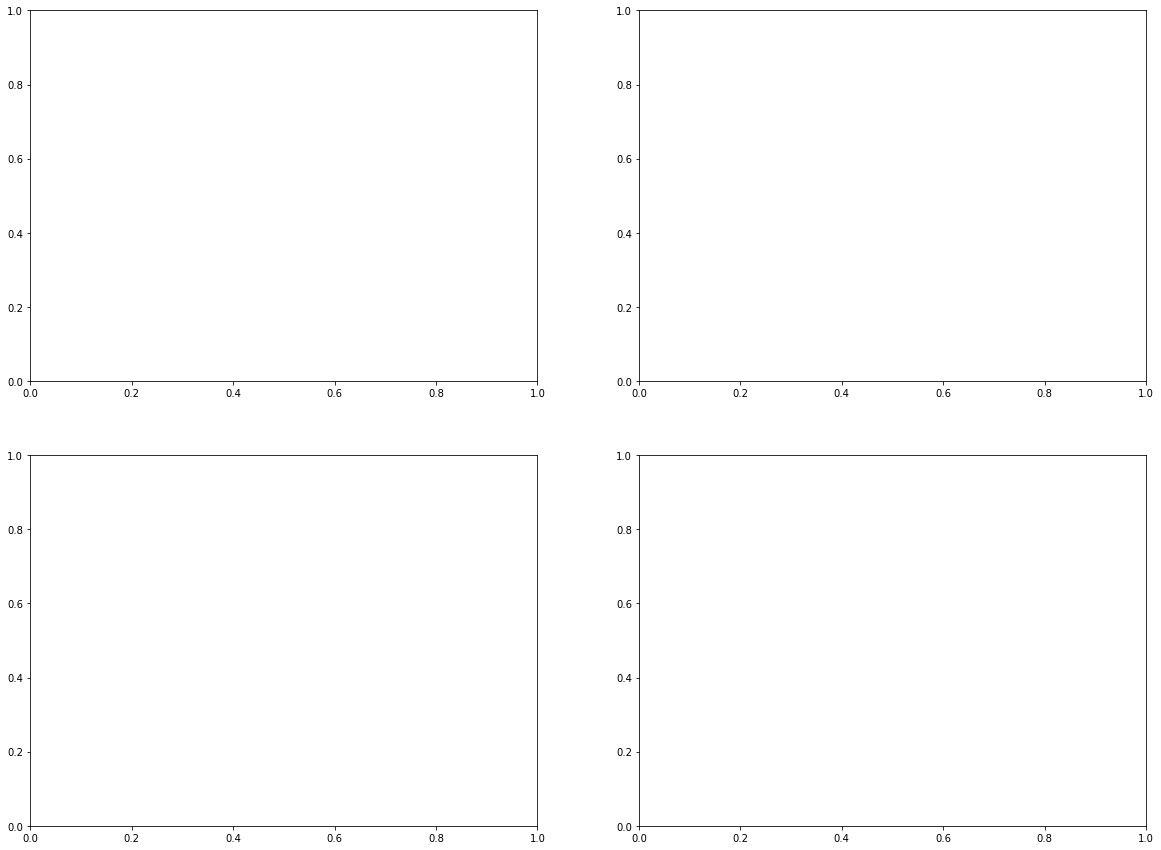

In [158]:
fig, ax = plt.subplots(2,2, figsize=(20,15))

ax[0][0].plot(vs_m.loc['high'], c='red')
ax[0][1].plot(vs_m.loc['medium'], c='red')
ax[1][0].plot(vs_m.loc['low'], c='red')

for axis in ax.ravel():
    axis.set_ylim(0,1500000)
    axis.set_xlabel('views')
    axis.set_ylabel('YT_views')
    axis.spines['right'].set_visible(False)
    axis.spines['top'].set_visible(False)
    
ax[0][0].legend(['high', 'average'], frameon=False)
ax[0][1].legend(['medium', 'average'], frameon=False)
ax[1][0].legend(['low', 'average'], frameon=False)

fig.suptitle('Table 1', fontsize = 25)

In [ ]:
fig.savefig('table_1.pdf')
fig.savefig('table_1.png', dpi=100)

In [ ]:
N = 10 ** 4
np.random.seed(42)

def plot_comparison(x, title):
    fig, ax = plt.subplots(3, 1, sharex=True, figsize=(15,10))
    sns.distplot(x, ax=ax[0])
    ax[0].set_title('Histogram + KDE')
    sns.boxplot(x=x, ax=ax[1])
    ax[1].set_title('Boxplot')
    sns.violinplot(x=x, ax=ax[2])
    ax[2].set_title('Violin plot')
    fig.suptitle(title, fontsize=16)
    plt.show()
    
sample_gaussin = np.random.normal(size=N)
plot_comparison(sample_gaussin, 'Standard Normal Distribution')

In [ ]:
sample_lognormal = np.random.lognormal(size=N)
plot_comparison(sample_lognormal, 'Log-normal Distribution')

In [159]:
sample_bimodal = np.concatenate([np.random.normal(loc=-2, scale=2, size=int(N/2)),
                                 np.random.normal(loc=3, scale=1, size=int(N/2))])
plot_comparison(sample_bimodal, 'Mixture of Gaussians - bimodal')

NameError: name 'N' is not defined

/Users/annabotsman/Desktop/anaconda/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sales', ylabel='Density'>

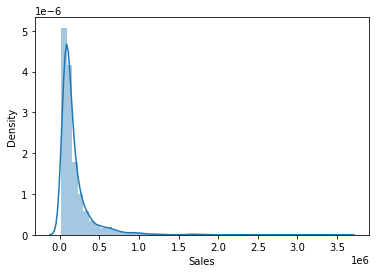

In [160]:
num_features = ['YT_pviews', 'YT_oviews', 'Google_imp', 'Email_imp', 'FB_imp', 'Aff_impt', 'Overall_views', 'Sales', 'YT_views', 'high']
cat_features = ['div', 'views', 'revenue']

sns.distplot(md['Sales'])

In [161]:
md['high'].value_counts()

0    2867
1     184
Name: high, dtype: int64

<AxesSubplot:ylabel='high'>

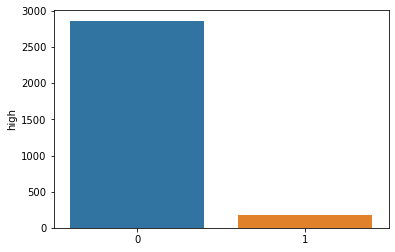

In [162]:
sns.barplot(x=md['high'].value_counts().index, y=md['high'].value_counts())

<AxesSubplot:xlabel='high', ylabel='Sales'>

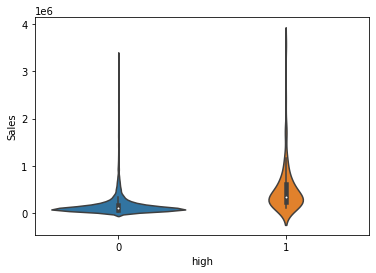

In [163]:
sns.violinplot(x=md['high'],y=md['Sales'])

<AxesSubplot:xlabel='high', ylabel='Sales'>

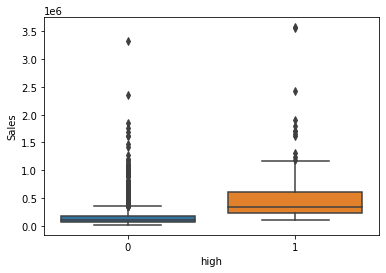

In [164]:
sns.boxplot(x=md['high'],y=md['Sales'])

In [165]:
correlation = md.corr().loc[num_features, num_features]
correlation

YT_pviews  YT_oviews  Google_imp  Email_imp    FB_imp  \
YT_pviews       1.000000   0.798104    0.305230   0.290203  0.318325   
YT_oviews       0.798104   1.000000    0.429167   0.342697  0.410265   
Google_imp      0.305230   0.429167    1.000000   0.636719  0.728787   
Email_imp       0.290203   0.342697    0.636719   1.000000  0.515894   
FB_imp          0.318325   0.410265    0.728787   0.515894  1.000000   
Aff_impt        0.215768   0.231719    0.353054   0.697002  0.290033   
Overall_views   0.960312   0.934390    0.379076   0.330243  0.378120   
Sales           0.289688   0.390960    0.783338   0.746729  0.749133   
YT_views        0.960392   0.934386    0.378959   0.330083  0.377960   
high            0.743135   0.740578    0.339251   0.325318  0.327906   

               Aff_impt  Overall_views     Sales  YT_views      high  
YT_pviews      0.215768       0.960312  0.289688  0.960392  0.743135  
YT_oviews      0.231719       0.934390  0.390960  0.934386  0.740578  
Google_imp     0.353054       0.379076  0.783338  0.378959  0.339251  
Email_imp      0.697002       0.330243  0.746729  0.330083  0.325318  
FB_imp         0.290033       0.378120  0.749133  0.377960  0.327906  
Aff_impt       1.000000       0.234696  0.440282  0.234745  0.263126  
Overall_views  0.234696       1.000000  0.352200  0.999954  0.781919  
Sales          0.440282       0.352200  1.000000  0.352099  0.338947  
YT_views       0.234745       0.999954  0.352099  1.000000  0.781907  
high           0.263126       0.781919  0.338947  0.781907  1.000000

<AxesSubplot:>

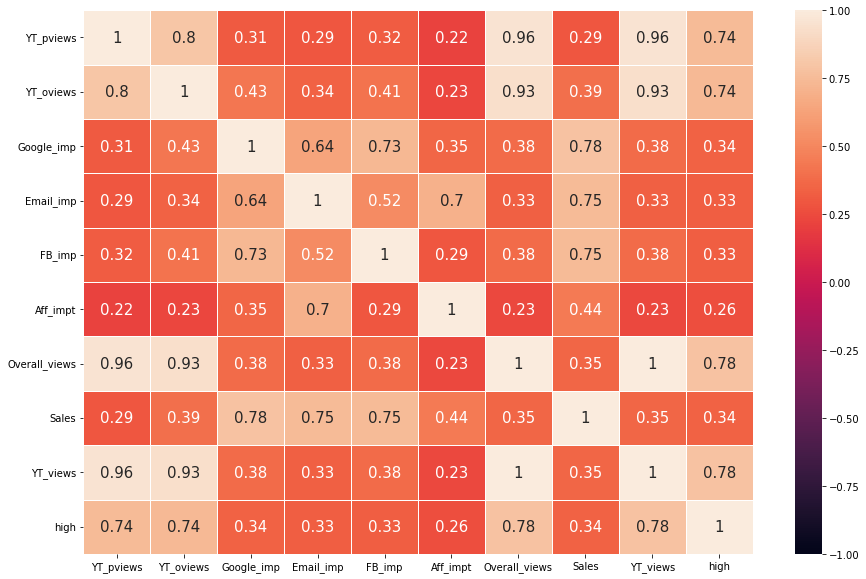

In [166]:
fig, ax = plt.subplots(figsize = (15,10))

sns.heatmap(correlation, annot=True, linecolor='white', linewidth=1,
           annot_kws = {'size':15}, vmax=1, vmin=-1)

###### Сильная корреляция у показов на Youtube и общих показов, возможно большую часть показов от общих составили как раз показы на Youtube

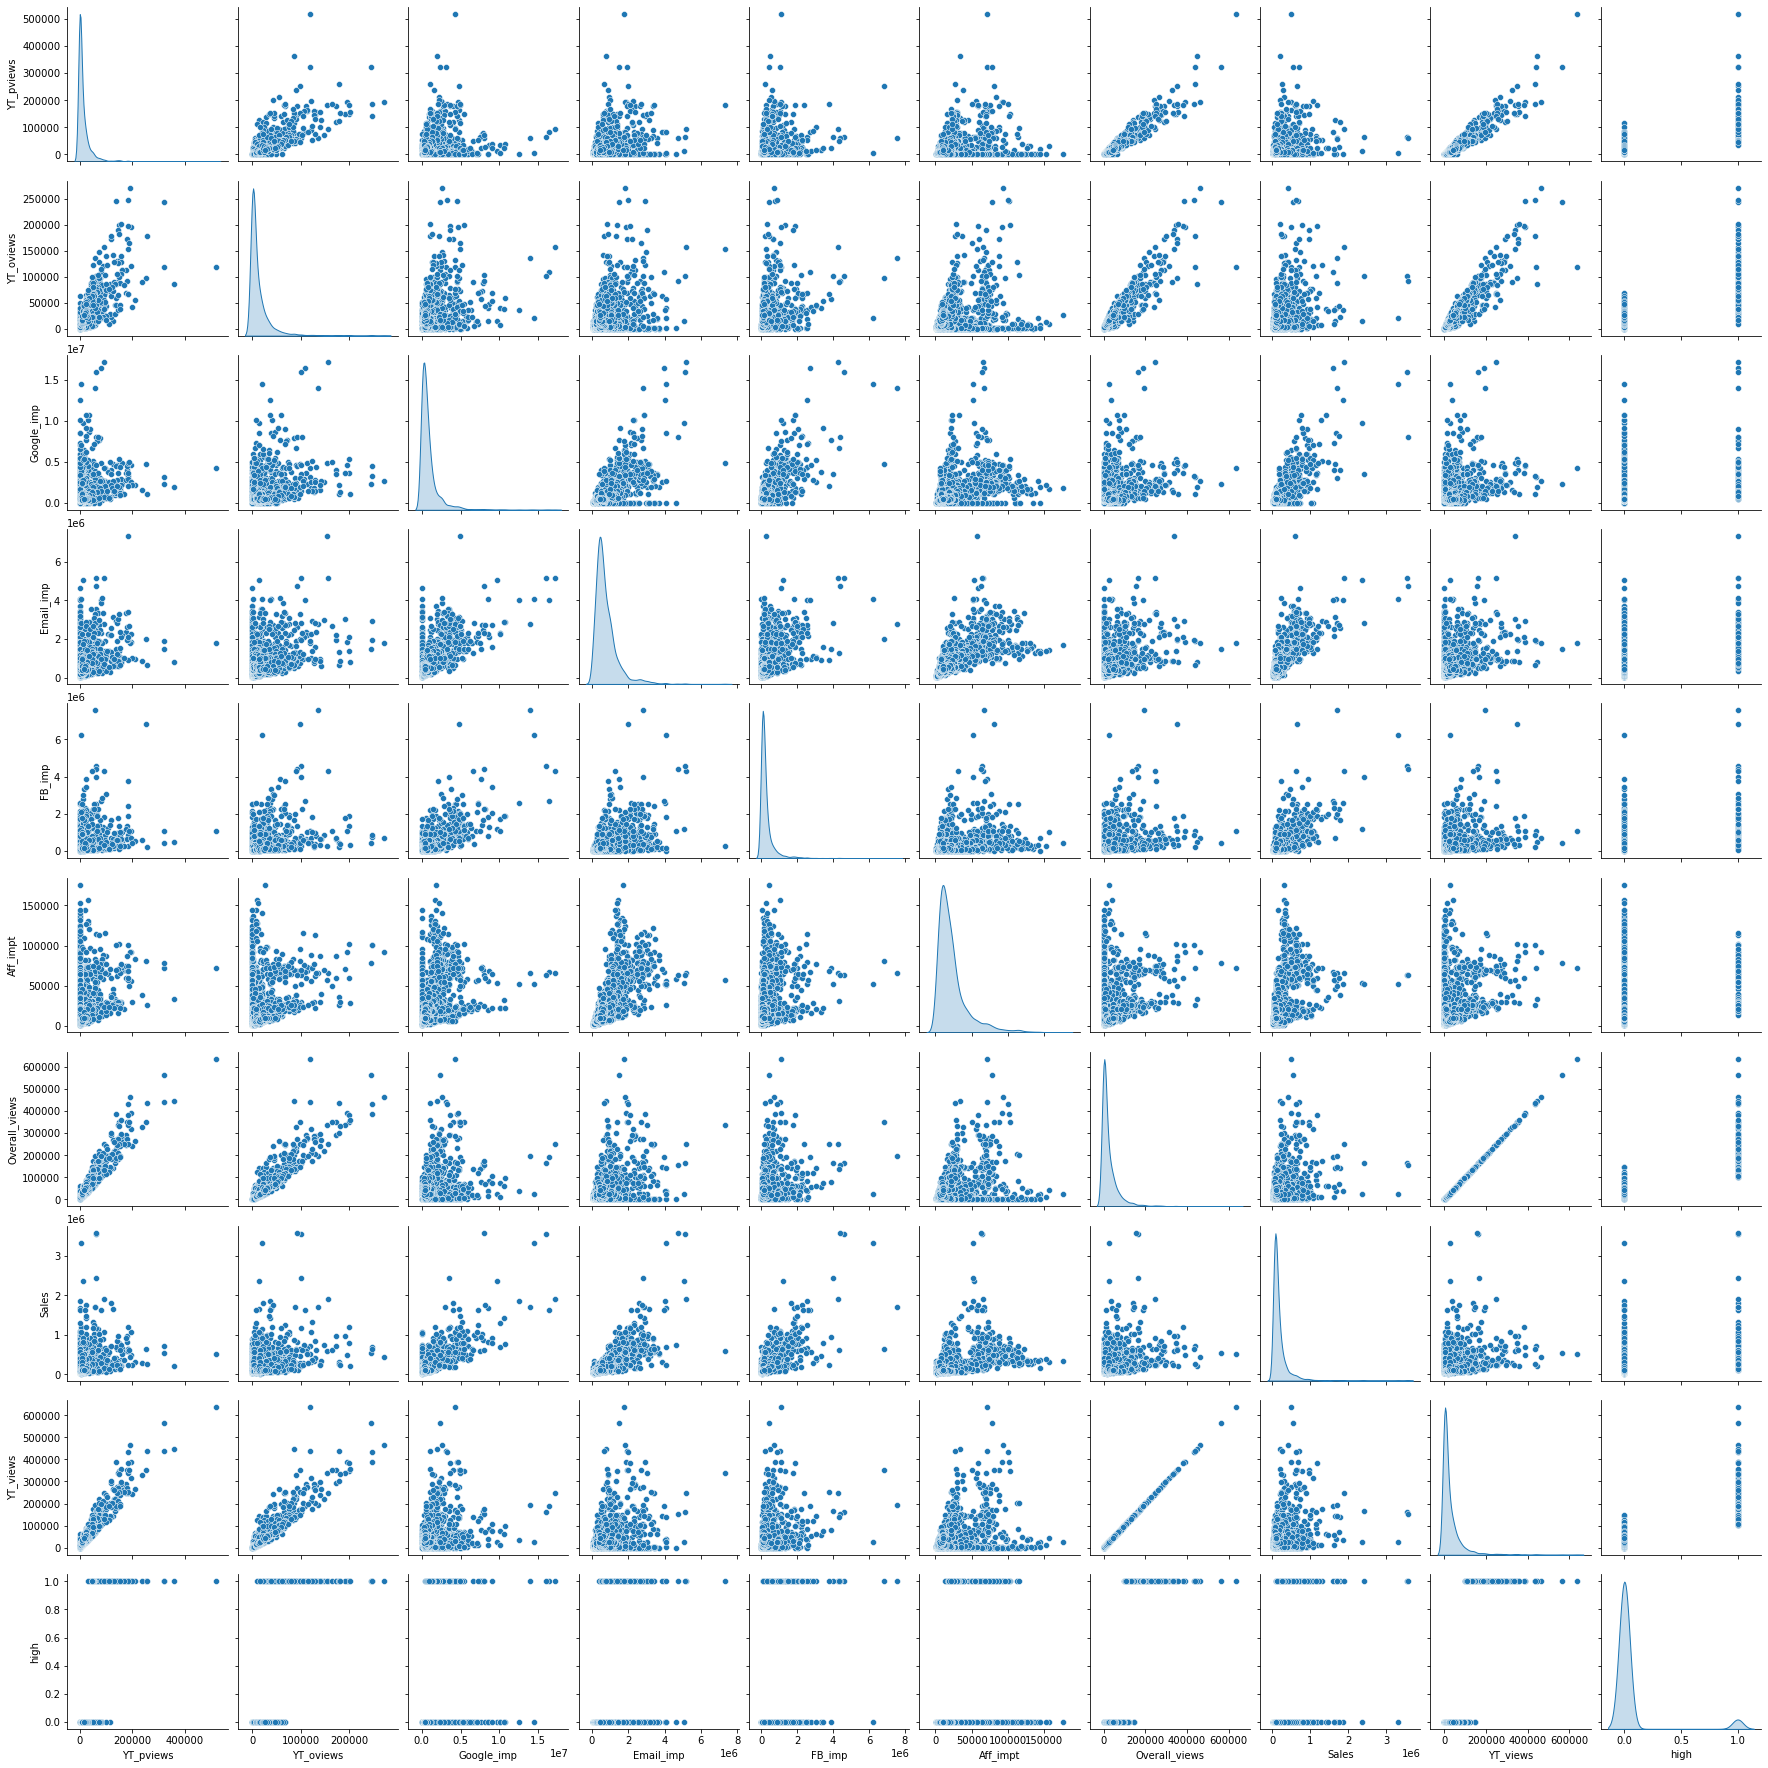

In [167]:
sns.pairplot(md[num_features], diag_kind='kde')

In [168]:
md_melted = pd.melt(md, id_vars='Sales', value_vars=cat_features)
md_melted

Sales variable   value
0      59417      div       A
1      56806      div       A
2      48715      div       A
3      72047      div       A
4      56235      div       A
...      ...      ...     ...
9148   82707  revenue  medium
9149   84503  revenue  medium
9150  147325  revenue    high
9151  111525  revenue    high
9152   98187  revenue  medium

[9153 rows x 3 columns]

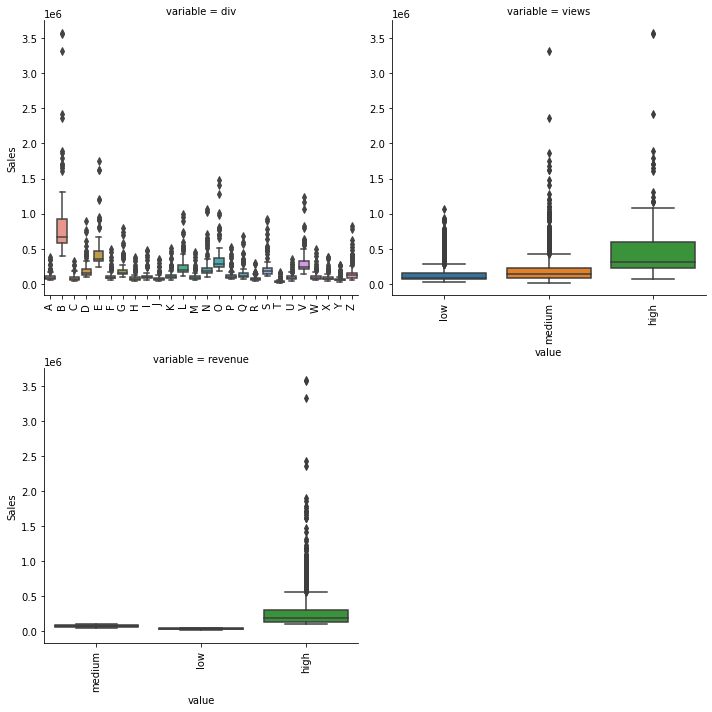

In [169]:
def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
    
g = sns.FacetGrid(md_melted, col="variable",
                col_wrap=2, sharex=False, sharey=False, height=5)
g.map(boxplot, 'value', 'Sales')

In [170]:
A = md[md['div'] == 'A']
A

div       date  YT_pviews  YT_oviews  Google_imp    Email_imp  FB_imp  \
0     A   1/6/2018        392        422         408  349895.0107   73580   
1     A  1/13/2018        787        904         110  506270.2176   11804   
2     A  1/20/2018         81        970         742  430042.1538   52232   
3     A  1/27/2018         25        575          65  417745.6658   78640   
4     A   2/3/2018        565        284         295  408505.8012   40561   
..   ..        ...        ...        ...         ...          ...     ...   
108   A   2/1/2020      24140      21028      565733  997442.7847   39280   
109   A   2/8/2020      24187      22064      574706  365408.0809  161435   
110   A  2/15/2020      23008      25885      432938  288944.3322  292028   
111   A  2/22/2020      18726      25271      442591  415592.4279  286872   
112   A  2/29/2020      13873      22205      430426  300293.8358  148089   

     Aff_impt  Overall_views   Sales  YT_views   views  high revenue  
0       12072            682   59417       814     low     0  medium  
1        9499            853   56806      1691     low     0  medium  
2       17048            759   48715      1051     low     0     low  
3       10207            942   72047       600     low     0  medium  
4        5834            658   56235       849     low     0  medium  
..        ...            ...     ...       ...     ...   ...     ...  
108      5686          45817   72475     45168  medium     0  medium  
109      4944          45482   77613     46251  medium     0  medium  
110      6133          47734  168172     48893  medium     0    high  
111      6760          43958  119598     43997  medium     0    high  
112      6864          35199   99357     36078  medium     0  medium  

[113 rows x 14 columns]

In [171]:
trace = go.Bar(x=A['views'], y=A['Sales'])

layout = go.Layout(title='Sales of product from the div A depending on views')

fig = go.Figure(data=trace, layout=layout)
fig

In [172]:
trace = go.Scatter(x=A['date'], y=A['Sales'])

layout = go.Layout(title='Sales of product from the div A from 2018 to 2020',
                  yaxis={'range':[0,400000]})

fig = go.Figure(data=trace, layout=layout)
fig

In [173]:
P = md[md['div'] == 'P']
P

div       date  YT_pviews  YT_oviews  Google_imp     Email_imp  FB_imp  \
1695   P   1/6/2018        479        128         845  5.837750e+05   92867   
1696   P  1/13/2018        785        719         815  8.446253e+05   16691   
1697   P  1/20/2018        297        687         748  7.162290e+05   45615   
1698   P  1/27/2018        332        251         248  6.971086e+05   79537   
1699   P   2/3/2018         12        639         181  6.814996e+05   47910   
...   ..        ...        ...        ...         ...           ...     ...   
1803   P   2/1/2020      14075      19641      899152  1.663252e+06   50648   
1804   P   2/8/2020      12475      19641      938791  6.089500e+05  188877   
1805   P  2/15/2020      11972      21796      698233  4.815887e+05  354191   
1806   P  2/22/2020       9981      21922      681970  6.935319e+05  353430   
1807   P  2/29/2020       8549      17833      647585  4.999992e+05  180094   

      Aff_impt  Overall_views   Sales  YT_views   views  high revenue  
1695     31918            189   67635       607     low     0  medium  
1696     33545            940   96133      1504     low     0  medium  
1697     40734            887   91509       984     low     0  medium  
1698     27488            427   81009       583     low     0  medium  
1699     25314            869   83766       651     low     0  medium  
...        ...            ...     ...       ...     ...   ...     ...  
1803     10572          32833   87633     33716  medium     0  medium  
1804     17917          31888  105378     32116  medium     0    high  
1805     11973          33519  169963     33768  medium     0    high  
1806     10775          31718  136343     31903  medium     0    high  
1807      9425          24745  120290     26382  medium     0    high  

[113 rows x 14 columns]

In [174]:
trace0 = go.Scatter(x=A['date'], y=A['Sales'],
                   name='div A')

trace1 = go.Scatter(x=P['date'], y=P['Sales'],
                    name='div P')

layout = go.Layout(title='Sales of product from the div A & P from 2018 to 2020',
                  yaxis={'range':[0,600000]})

fig = go.Figure(data=[trace0, trace1], layout=layout)
fig

In [175]:
# Критерий Хи-Квадрат
# посмотрим зависимость продаж от кол-ва показов рекламной кампании
# анализируем по продажам и показам рекламной кампании продукта P
# создадим новые переменные

P['v_adj'] = P['Overall_views']
P['r_adj'] = P['Sales']

def get_v_adj(v_adj):
    if v_adj >= 50000:
        return 1
    elif v_adj < 50000:
        return 0
    else: 
        return v_adj
    
def get_r_adj(r_adj):
    if r_adj >= 100000:
        return 1
    elif r_adj < 100000:
        return 0
    else:
        return r_adj
    
P['v_adj'] = P['v_adj'].apply(get_v_adj)
P['r_adj'] = P['r_adj'].apply(get_r_adj)
P

/var/folders/l7/j8jzwtl53wj2g2m9zwt6tcvh0000gn/T/ipykernel_3129/4012549743.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/l7/j8jzwtl53wj2g2m9zwt6tcvh0000gn/T/ipykernel_3129/4012549743.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/l7/j8jzwtl53wj2g2m9zwt6tcvh0000gn/T/ipykernel_3129/4012549743.py:25: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

div       date  YT_pviews  YT_oviews  Google_imp     Email_imp  FB_imp  \
1695   P   1/6/2018        479        128         845  5.837750e+05   92867   
1696   P  1/13/2018        785        719         815  8.446253e+05   16691   
1697   P  1/20/2018        297        687         748  7.162290e+05   45615   
1698   P  1/27/2018        332        251         248  6.971086e+05   79537   
1699   P   2/3/2018         12        639         181  6.814996e+05   47910   
...   ..        ...        ...        ...         ...           ...     ...   
1803   P   2/1/2020      14075      19641      899152  1.663252e+06   50648   
1804   P   2/8/2020      12475      19641      938791  6.089500e+05  188877   
1805   P  2/15/2020      11972      21796      698233  4.815887e+05  354191   
1806   P  2/22/2020       9981      21922      681970  6.935319e+05  353430   
1807   P  2/29/2020       8549      17833      647585  4.999992e+05  180094   

      Aff_impt  Overall_views   Sales  YT_views   views  high revenue  v_adj  \
1695     31918            189   67635       607     low     0  medium      0   
1696     33545            940   96133      1504     low     0  medium      0   
1697     40734            887   91509       984     low     0  medium      0   
1698     27488            427   81009       583     low     0  medium      0   
1699     25314            869   83766       651     low     0  medium      0   
...        ...            ...     ...       ...     ...   ...     ...    ...   
1803     10572          32833   87633     33716  medium     0  medium      0   
1804     17917          31888  105378     32116  medium     0    high      0   
1805     11973          33519  169963     33768  medium     0    high      0   
1806     10775          31718  136343     31903  medium     0    high      0   
1807      9425          24745  120290     26382  medium     0    high      0   

      r_adj  
1695      0  
1696      0  
1697      0  
1698      0  
1699      0  
...     ...  
1803      0  
1804      1  
1805      1  
1806      1  
1807      1  

[113 rows x 16 columns]

In [176]:
ct_o = P.groupby('v_adj')['r_adj'].value_counts().unstack()
ct_o

r_adj     0     1
v_adj            
0      55.0  56.0
1       2.0   NaN

In [177]:
alpha = 0.01
dof = (2-1)*(2-1)
print(dof)
critical_value = 6.63

1


In [178]:
n_total = ct_o.sum().sum()
print(n_total)

113.0


In [179]:
n_rev_0 = ct_o[0].sum()
n_rev_1 = ct_o[1].sum()
print(n_rev_0, n_rev_1)

57.0 56.0


In [180]:
p_rev_0 = n_rev_0 / n_total
p_rev_1 = n_rev_1 / n_total
print(p_rev_0, p_rev_1)

0.504424778761062 0.49557522123893805


In [181]:
n_vl = ct_o.iloc[0].sum()
n_vh = ct_o.iloc[1].sum()
print(n_vl, n_vh)

111.0 2.0


In [182]:
f_e_rev_0_vl = n_vl * p_rev_0
f_e_rev_1_vl = n_vl * p_rev_1
print(f_e_rev_0_vl, f_e_rev_1_vl)

55.991150442477874 55.008849557522126


In [183]:
f_e_rev_0_vh = n_vh * p_rev_0
f_e_rev_1_vh = n_vh * p_rev_1
print(f_e_rev_0_vh, f_e_rev_1_vh)

1.008849557522124 0.9911504424778761


In [184]:
ct_e = np.array([[f_e_rev_0_vl, f_e_rev_1_vl],
                [f_e_rev_0_vh, f_e_rev_1_vh]])
print(ct_e)

[[55.99115044 55.00884956]
 [ 1.00884956  0.99115044]]


In [185]:
ct_o[0].sum() * ct_o.iloc[0].sum() / n_total

55.991150442477874

In [186]:
ct_o

r_adj     0     1
v_adj            
0      55.0  56.0
1       2.0   NaN

In [187]:
chi_square = ((ct_o - ct_e)**2 / ct_e).sum().sum()

In [188]:
print(chi_square, critical_value)
print(chi_square > critical_value)

1.0091656631013872 6.63
False


In [189]:
scipy.stats.chi2_contingency(ct_o)

(nan,
 nan,
 1,
 array([[nan, nan],
        [nan, nan]]))

In [190]:
ct_e

array([[55.99115044, 55.00884956],
       [ 1.00884956,  0.99115044]])

###### Нулевую гипотезу о том, что кол-во продаж продукта Р зависит от кол-ва показов отвергнуть не можем, тк критерий меньше критического значения - зависимость, скорее всего, отсутствует

In [191]:
# T test
# проверим гипотезу о зависимости высоких значений продаж и показов реклманых кампаний от года

md['year'] = md['date']
md

div       date  YT_pviews  YT_oviews  Google_imp     Email_imp  FB_imp  \
0      A   1/6/2018        392        422         408  3.498950e+05   73580   
1      A  1/13/2018        787        904         110  5.062702e+05   11804   
2      A  1/20/2018         81        970         742  4.300422e+05   52232   
3      A  1/27/2018         25        575          65  4.177457e+05   78640   
4      A   2/3/2018        565        284         295  4.085058e+05   40561   
...   ..        ...        ...        ...         ...           ...     ...   
3046   Z   2/1/2020      29239      25311      622406  1.459071e+06   45026   
3047   Z   2/8/2020      26230      28031      624409  5.342505e+05  227070   
3048   Z  2/15/2020      24749      31281      439362  4.227182e+05  393685   
3049   Z  2/22/2020      20713      30356      464178  6.085799e+05  424676   
3050   Z  2/29/2020      15990      26993      449032  4.390165e+05  161439   

      Aff_impt  Overall_views   Sales  YT_views   views  high revenue  \
0        12072            682   59417       814     low     0  medium   
1         9499            853   56806      1691     low     0  medium   
2        17048            759   48715      1051     low     0     low   
3        10207            942   72047       600     low     0  medium   
4         5834            658   56235       849     low     0  medium   
...        ...            ...     ...       ...     ...   ...     ...   
3046     12098          53667   82707     54550  medium     0  medium   
3047      9548          53665   84503     54261  medium     0  medium   
3048      9861          55561  147325     56030  medium     0    high   
3049     10221          49221  111525     51069  medium     0    high   
3050     10294          42994   98187     42983  medium     0  medium   

           year  
0      1/6/2018  
1     1/13/2018  
2     1/20/2018  
3     1/27/2018  
4      2/3/2018  
...         ...  
3046   2/1/2020  
3047   2/8/2020  
3048  2/15/2020  
3049  2/22/2020  
3050  2/29/2020  

[3051 rows x 15 columns]

In [197]:
md['year'] = md['year'].apply(lambda x: int(x.split('/')[2]))
md

div       date  YT_pviews  YT_oviews  Google_imp     Email_imp  FB_imp  \
0      A   1/6/2018        392        422         408  3.498950e+05   73580   
1      A  1/13/2018        787        904         110  5.062702e+05   11804   
2      A  1/20/2018         81        970         742  4.300422e+05   52232   
3      A  1/27/2018         25        575          65  4.177457e+05   78640   
4      A   2/3/2018        565        284         295  4.085058e+05   40561   
...   ..        ...        ...        ...         ...           ...     ...   
3046   Z   2/1/2020      29239      25311      622406  1.459071e+06   45026   
3047   Z   2/8/2020      26230      28031      624409  5.342505e+05  227070   
3048   Z  2/15/2020      24749      31281      439362  4.227182e+05  393685   
3049   Z  2/22/2020      20713      30356      464178  6.085799e+05  424676   
3050   Z  2/29/2020      15990      26993      449032  4.390165e+05  161439   

      Aff_impt  Overall_views   Sales  YT_views   views  high revenue  year  
0        12072            682   59417       814     low     0  medium  2018  
1         9499            853   56806      1691     low     0  medium  2018  
2        17048            759   48715      1051     low     0     low  2018  
3        10207            942   72047       600     low     0  medium  2018  
4         5834            658   56235       849     low     0  medium  2018  
...        ...            ...     ...       ...     ...   ...     ...   ...  
3046     12098          53667   82707     54550  medium     0  medium  2020  
3047      9548          53665   84503     54261  medium     0  medium  2020  
3048      9861          55561  147325     56030  medium     0    high  2020  
3049     10221          49221  111525     51069  medium     0    high  2020  
3050     10294          42994   98187     42983  medium     0  medium  2020  

[3051 rows x 15 columns]

In [198]:
high = md[md['high'] == 1]['year']
non_high = md[md['high'] == 0]['year']

<AxesSubplot:>

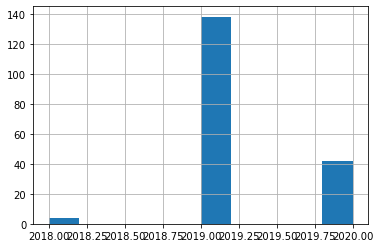

In [199]:
high.hist()

<AxesSubplot:>

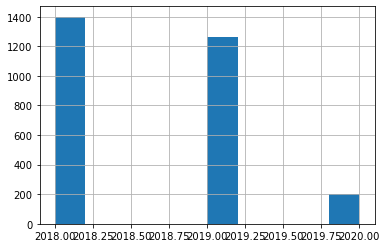

In [200]:
non_high.hist()

In [201]:
dof_vs = len(high) + len(non_high) - 2
print(dof_vs)

3049


In [202]:
n_1 = len(non_high)
n_2 = len(high)
var_1 = non_high.var()
var_2 = high.var()
print(n_1, n_2, var_1, var_2)

2867 184 0.3836600086992199 0.2084818246614392


In [204]:
v_1 = var_1 / n_1
v_2 = var_2 / n_2
dof_t = (v_1 + v_2)**2 / (v_1**2/(n_1 - 1) + v_2**2/(n_2 - 1))
print(int(dof_t))

228


###### Критическое значение t-критерия: +- 1.9667, критическая область: (-∞, -1.9667] ∪ [1.9667, ∞)

In [205]:
def hypothesis_check(t, t_critical):
    if abs(t) > t_critical:
        print('Отвергаем H0. Разница между средними статистически значима.')
    else:
        print('Не удалось отвергнуть H0')

t_critical = 1.9667        

In [206]:
s_m1_m2 = np.sqrt(v_1 + v_2)
print(s_m1_m2)

0.0355931555396242


In [207]:
mean_1 = non_high.mean()
mean_2 = high.mean()
print(mean_1, mean_2)

2018.581792814789 2019.2065217391305


In [208]:
t = (mean_1 - mean_2) / s_m1_m2
print(t)

-17.55193982860114


In [209]:
hypothesis_check(t, t_critical)

Отвергаем H0. Разница между средними статистически значима.


In [211]:
scipy.stats.ttest_ind_from_stats(mean_1, np.sqrt(var_1), n_1,
                                mean_2, np.sqrt(var_2), n_2,
                                equal_var=False)

Ttest_indResult(statistic=-17.55193982860114, pvalue=3.015647344594042e-44)

In [213]:
scipy.stats.ttest_ind(non_high, high, equal_var=False)

Ttest_indResult(statistic=-17.5519398286011, pvalue=3.0156473445946803e-44)

In [214]:
CI_low = (mean_1 - mean_2) - t_critical*s_m1_m2
print(CI_low)

-0.6947299833413042


In [215]:
CI_bottom = (mean_1 - mean_2) + t_critical*s_m1_m2
print(CI_bottom)

-0.5547278653417463


In [216]:
# Линейная регрессия

import statsmodels.api as sm

In [231]:
div_sum = md.groupby(md['year'])['Sales'].sum()
YT_mean = md.groupby(md['year'])['YT_views'].mean()
Aff_mean = md.groupby(md['year'])['Aff_impt'].mean()
FB_mean = md.groupby(md['year'])['FB_imp'].mean()
Ov_mean = md.groupby(md['year'])['Overall_views'].mean()

md_year = pd.concat([div_sum, YT_mean, Aff_mean, FB_mean, Ov_mean], axis = 1)
md_year.head()

Sales      YT_views      Aff_impt         FB_imp  Overall_views
year                                                                     
2018  247357254   3765.819088  25918.817664  178113.770655    3288.423077
2019  277286137  45895.560541  20933.749288  360547.617521   45427.334046
2020   42541770  70268.304527  16955.390947  266771.794239   69847.102881

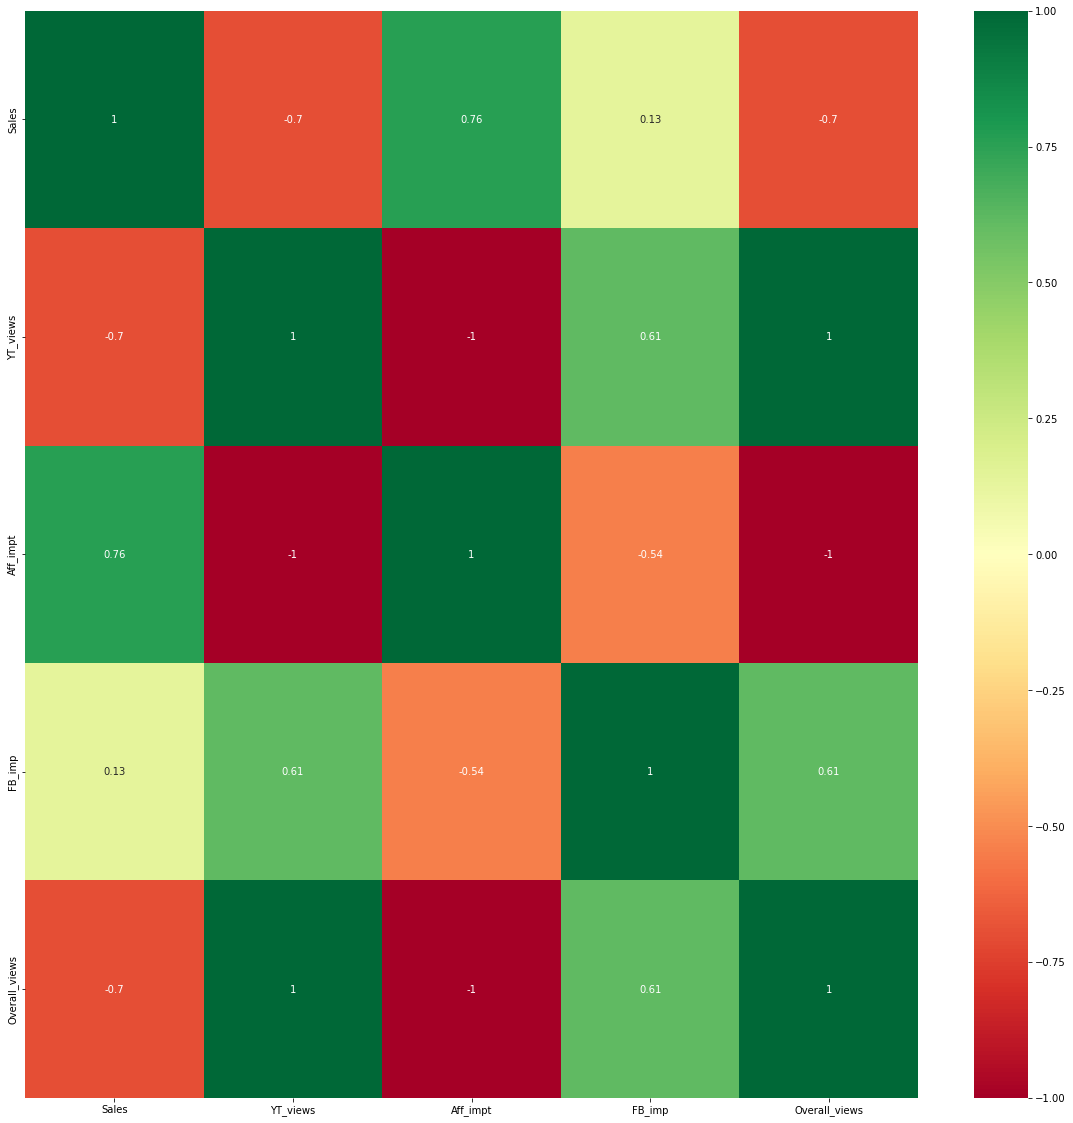

In [232]:
plt.figure(figsize=(20,20))
p=sns.heatmap(md_year.corr(), annot=True,cmap='RdYlGn', vmin=-1, vmax=1)

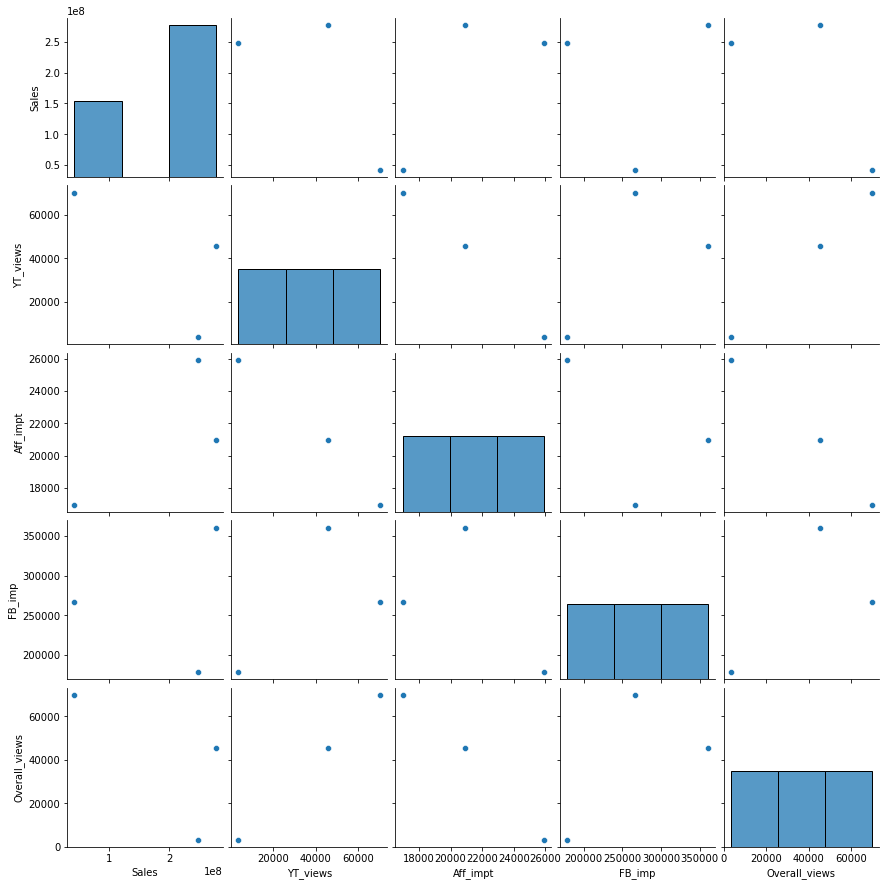

In [233]:
sns.pairplot(md_year)

In [234]:
x = md_year['Overall_views']
y = md_year['Sales']

res = scipy.stats.linregress(x, y)
print(res)

LinregressResult(slope=-2661.466108263152, intercept=294245398.199058, rvalue=-0.7013571171763484, pvalue=0.5051556959656902, stderr=2704.9270525464744, intercept_stderr=130221700.28994466)


In [235]:
r_sq = res.rvalue ** 2
print(r_sq)

0.4919018058139181


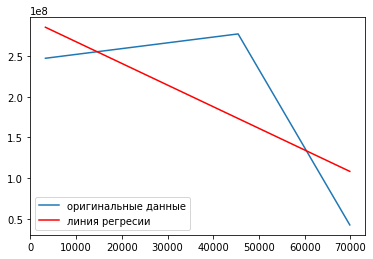

In [236]:
plt.plot(x, y, label = 'оригинальные данные')
plt.plot(x, res.intercept + res.slope * x, 'r', label = 'линия регресии')
plt.legend()
plt.show()

In [238]:
x_simple = md_year['Overall_views']
y = md_year['Sales']
x_simple_constant = sm.add_constant(x_simple)

model = sm.OLS(y, x_simple_constant)
res_simple = model.fit()
print(res_simple.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                 -0.016
Method:                 Least Squares   F-statistic:                    0.9681
Date:                Sun, 11 Dec 2022   Prob (F-statistic):              0.505
Time:                        16:17:14   Log-Likelihood:                -58.630
No. Observations:                   3   AIC:                             121.3
Df Residuals:                       1   BIC:                             119.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2.942e+08    1.3e+08      2.260

/Users/annabotsman/Desktop/anaconda/anaconda3/lib/python3.9/site-packages/statsmodels/stats/stattools.py:74: ValueWarning:

omni_normtest is not valid with less than 8 observations; 3 samples were given.



In [239]:
x_simple_constant

const  Overall_views
year                      
2018    1.0    3288.423077
2019    1.0   45427.334046
2020    1.0   69847.102881

In [240]:
x_mult = sm.add_constant(md_year.drop('Sales', axis=1))
x_mult

const      YT_views      Aff_impt         FB_imp  Overall_views
year                                                                 
2018    1.0   3765.819088  25918.817664  178113.770655    3288.423077
2019    1.0  45895.560541  20933.749288  360547.617521   45427.334046
2020    1.0  70268.304527  16955.390947  266771.794239   69847.102881

In [242]:
model = sm.OLS(y, x_mult)
res_mult = model.fit()
print(res_mult.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Sun, 11 Dec 2022   Prob (F-statistic):                nan
Time:                        16:22:23   Log-Likelihood:                 41.656
No. Observations:                   3   AIC:                            -77.31
Df Residuals:                       0   BIC:                            -80.02
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0473        inf          0

/Users/annabotsman/Desktop/anaconda/anaconda3/lib/python3.9/site-packages/statsmodels/stats/stattools.py:74: ValueWarning:

omni_normtest is not valid with less than 8 observations; 3 samples were given.

/Users/annabotsman/Desktop/anaconda/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1749: RuntimeWarning:

divide by zero encountered in true_divide

/Users/annabotsman/Desktop/anaconda/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1749: RuntimeWarning:

invalid value encountered in double_scalars

/Users/annabotsman/Desktop/anaconda/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1671: RuntimeWarning:

divide by zero encountered in double_scalars



In [247]:
# Логистическая регрессия

cols_num = ['high', 'v_adj', 'r_adj']

In [252]:
x = sm.add_constant(P['v_adj'])
y = P['r_adj']

logit = sm.Logit(y, x)
results = logit.fit()
print(results.summary())

         Current function value: 0.680839
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                  r_adj   No. Observations:                  113
Model:                          Logit   Df Residuals:                      111
Method:                           MLE   Df Model:                            1
Date:                Sun, 11 Dec 2022   Pseudo R-squ.:                 0.01770
Time:                        16:35:16   Log-Likelihood:                -76.935
converged:                      False   LL-Null:                       -78.321
Covariance Type:            nonrobust   LLR p-value:                   0.09588
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0180      0.190      0.095      0.924      -0.354       0.390
v_adj        -24.9809   1.86e+05     -0.000      1.000   -3.65e+0

/Users/annabotsman/Desktop/anaconda/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [254]:
np.exp(0.0180)

1.0181629763897937

In [255]:
np.exp(-24.9809)

1.4155753028726539e-11

In [256]:
P.groupby('v_adj')['r_adj'].value_counts().unstack()

r_adj     0     1
v_adj            
0      55.0  56.0
1       2.0   NaN

In [258]:
p_1_0 = 2.0 / (2.0 + 55.0)
p_0_0 = 1 - p_1_0
odds_1_0 = p_1_0 / p_0_0
print(odds_1_0)
print(np.log(odds_1_0))

0.03636363636363636
-3.3141860046725258
